# Q feature Assesment

## Purpose: To Evaluate Q alpha as a feature for random forest.

histogram normalized with both mat and non mat on hist  

histogram of all q values, of q mat values, q non mat values.  

histogram of all n values, of n mat values, n non mat values   

same for z, s2, s   

normalized histogram, all side by side

do bias/variance examinantion reitrating through zq rf.  

evaluate an error bar for values without experimental values by making multiple rf plot.

make things more efficient put things in functions ee

do ki square and also with ki square with z values above 20


importing libraries.

In [2]:
#Importing essentials
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from scipy.stats import norm
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import normalize


importing N,Z,y, S_p,S_2p, S_n,S_2n of experimental

ki square. experimental and theoretical model
exp the+ml diff

distinguish between all and all above z=20.ra


ki square of training, testing, all
anything between calcium and uranium 
like in the the paper. 
100 runs to find the sd and mean for variance


In [3]:
#importing from experimental file
# Num Nuc  A   N   Z        E        E/A     dE     Eval    S1n     dS1n  Eval    
# 0   1    2   3   4        5        6       7      8       9       10    11

#S1p     dS1p  Eval    S2n     dS2n  Eval    S2p     dS2p  Eval
#12      13    14      15      16    17      18      19    20

N_exp  = np.genfromtxt('EXPERIMENT_AME2016.dat',usecols=3) #Number of neutrons
Z_exp  = np.genfromtxt('EXPERIMENT_AME2016.dat',usecols=4) #Number of protons
X_exp  = np.transpose(np.stack((Z_exp,N_exp)))
A_exp  = N_exp+Z_exp # Total number of Nucleons

# Difference between the experimental binding energy and the Liquid drop model
y_exp  = -np.genfromtxt('EXPERIMENT_AME2016.dat',usecols=5)
dy_exp = -np.genfromtxt('EXPERIMENT_AME2016.dat',usecols=7)

S_p_exp  = -np.genfromtxt('EXPERIMENT_AME2016.dat',usecols=12)
S_2p_exp = -np.genfromtxt('EXPERIMENT_AME2016.dat',usecols=18)

S_n_exp =-np.genfromtxt('EXPERIMENT_AME2016.dat',usecols=9)
S_2n_exp=-np.genfromtxt('EXPERIMENT_AME2016.dat',usecols=15)

X_exp     = np.transpose(np.stack((Z_exp,   N_exp,  A_exp,  y_exp)))

y_exp_d={}
S_n_exp_d={}
S_2n_exp_d={}

for i in range(0,len(N_exp)):
    y_exp_d[Z_exp[i], N_exp[i]]=y_exp[i]
    S_n_exp_d[Z_exp[i], N_exp[i]]=S_n_exp[i]
    S_2n_exp_d[Z_exp[i], N_exp[i]]=S_2n_exp[i]

importing N,Z,y, S_p,S_2p, S_n,S_2n of SKMS

In [4]:
#SKMS importing relevent data
#Symbol Z  N A Binding_Energy_(MeV)  S_p_(MeV)  S_{2p}_(MeV) S_n_(MeV)  S_{2n}_(MeV) Q_{alpha}_(MeV)       
#0      1  2 3 4                     5          6            7          8            9

Z_SKMS    = np.genfromtxt('SKMS_all_nuclei-new.dat',usecols=1) #Number of protons
N_SKMS    = np.genfromtxt('SKMS_all_nuclei-new.dat',usecols=2) #Number of neutrons
A_SKMS    = N_SKMS+Z_SKMS                                      #Total number of Nucleons
y_SKMS    = -np.genfromtxt('SKMS_all_nuclei-new.dat',usecols=4)

S_p_SKMS  = -np.genfromtxt('SKMS_all_nuclei-new.dat',usecols=5)
S_2p_SKMS = -np.genfromtxt('SKMS_all_nuclei-new.dat',usecols=6)

S_n_SKMS  = -np.genfromtxt('SKMS_all_nuclei-new.dat',usecols=7)
S_2n_SKMS = -np.genfromtxt('SKMS_all_nuclei-new.dat',usecols=8)

Q_SKMS    = -np.genfromtxt('SKMS_all_nuclei-new.dat',usecols=9)

S_p_SKMS  = np.where(np.isnan(S_p_SKMS), 0, S_p_SKMS)
S_2p_SKMS = np.where(np.isnan(S_2p_SKMS), 0, S_2p_SKMS)

S_n_SKMS  = np.where(np.isnan(S_n_SKMS), 0, S_n_SKMS)
S_2n_SKMS = np.where(np.isnan(S_2n_SKMS), 0, S_2n_SKMS)

Q_SKMS=np.where(np.isnan(Q_SKMS), 0, Q_SKMS)

X_SKMS    = np.transpose(np.stack((Z_SKMS, N_SKMS, A_SKMS, y_SKMS, S_p_SKMS, S_2p_SKMS, S_n_SKMS, S_2n_SKMS, Q_SKMS)))
NZ_SKMS   = np.transpose(np.stack((Z_SKMS, N_SKMS)))

y_SKMS_d    ={}
S_p_SKMS_d  ={}
S_2p_SKMS_d ={}

S_n_SKMS_d  ={}
S_2n_SKMS_d ={}

Q_SKMS_d    ={}

for i in range(0,len(X_SKMS)):
    y_SKMS_d[Z_SKMS[i], N_SKMS[i]]=y_SKMS[i]
    S_p_SKMS_d[Z_SKMS[i], N_SKMS[i]]=S_p_SKMS[i]
    S_2p_SKMS_d[Z_SKMS[i], N_SKMS[i]]=S_2p_SKMS[i]
    S_n_SKMS_d[Z_SKMS[i], N_SKMS[i]]=S_n_SKMS[i]
    S_2n_SKMS_d[Z_SKMS[i], N_SKMS[i]]=S_2n_SKMS[i]
    Q_SKMS_d[Z_SKMS[i], N_SKMS[i]]=Q_SKMS[i]


# Get current size
fig_size = plt.rcParams["figure.figsize"]
# Prints: [8.0, 6.0]
#print ("Current size:", fig_size)
# Set figure width to 12 and height to 9
fig_size[0] = 15
fig_size[1] = 12
plt.rcParams["figure.figsize"] = fig_size




Comparing SKMS and experimental to see what NZ values they have in common.  
adding matching N,Z values to a list.  
making list of non matching values


In [5]:
y_matSKMS_d  ={}

Q_matSKMS_d  ={}
y_matexp_d   ={}
Q_matexp_d   ={}

N_mat        =[]
Z_mat        =[]
diff_mat     =[]
Q_matSKMS    =[]
Q_matexp     =[]

for n in range(0, 177+1):
    for z in range(0, 118+1):
        try:
            if y_exp_d[z,n]!=0 and y_SKMS_d[z,n]!=0:
                y_matSKMS_d[z,n]=y_SKMS_d[z,n]
                Q_matSKMS_d[z,n]=Q_SKMS_d[z,n]
                
                y_matexp_d[z,n] =y_exp_d[z,n]
                #Q_matexp_d[z,n]=Q_exp_d[z,n]
            
                N_mat.append(n)
                Z_mat.append(z)
                diff_mat.append(y_exp_d[z,n]-y_SKMS_d[z,n])
                Q_matSKMS.append(Q_SKMS_d[z,n])
                #Q_matexp.append(Q_exp_d[z,n])
                
                
        except KeyError:
            continue


                
                
S_n_matexp_d={} 
S_n_matSKMS_d={}
S_n_matexp=[] 
S_n_matSKMS=[]

S_p_matSKMS=[]

N_S_n_mat=[]
Z_S_n_mat=[]

Q_S_n_matSKMS_d={}
diff_S_n_mat=[]
Q_S_n_matSKMS=[]


for n in range(0, 177+1):
    for z in range(0, 118+1):
        try:
            if S_n_exp_d[z,n]!=0 and S_n_SKMS_d[z,n]!=0:
                S_n_matexp_d[z,n] =S_n_exp_d[z,n]
                S_n_matSKMS_d[z,n]=S_n_SKMS_d[z,n]
                S_n_matexp.append(S_n_exp_d[z,n]) 
                S_n_matSKMS.append(S_n_SKMS_d[z,n])
                
                S_p_matSKMS.append(S_p_SKMS_d[z,n])
                
                N_S_n_mat.append(n)
                Z_S_n_mat.append(z)
                
                Q_S_n_matSKMS_d[z,n]=Q_SKMS_d[z,n]
                
                diff_S_n_mat.append(y_exp_d[z,n]-y_SKMS_d[z,n])
                Q_S_n_matSKMS.append(Q_SKMS_d[z,n])
                
        except KeyError:
            continue
            

N_nomatSKMS=[]
Z_nomatSKMS=[]
y_nomatSKMS=[]
Q_nomatSKMS=[]
S_n_nomatSKMS=[]
S_p_nomatSKMS=[]


for n in range(0, 301):
    for z in range(0, 121):
        try:
            #print('y_exp_d[n, z]')
            y_exp_d[z,n]
            
        except KeyError:
            try:
                #print('if y_SKMS_d[n,z]!=0:')
                if y_SKMS_d[z,n]!=0:
                    #print('N_nomatSKMS=n')
                    N_nomatSKMS.append(n)
                    Z_nomatSKMS.append(z)
                    y_nomatSKMS.append(y_SKMS_d[z,n])
                    Q_nomatSKMS.append(Q_SKMS_d[z,n])
                    S_n_nomatSKMS.append(S_n_SKMS_d[z,n])
                    S_p_nomatSKMS.append(S_p_SKMS_d[z,n])
                    
            except KeyError:
                #print('continue')
                continue
                
        continue
                
    
            
            
  
print(np.shape(Z_nomatSKMS))
print(np.shape(N_nomatSKMS))
print(np.shape(y_nomatSKMS))
print(np.shape(Q_nomatSKMS))
            
            

(5430,)
(5430,)
(5430,)
(5430,)


Creating SKMS proton and Neutron dripline  


In [6]:
#X_SKMS    = np.transpose(np.stack((Z_SKMS, N_SKMS, A_SKMS, y_SKMS, S_p_SKMS, S_2p_SKMS, S_n_SKMS, S_2n_SKMS, Q_SKMS)))
ndrip_SKMS=[]
zdep_SKMS =[]

zdrip_SKMS=[]
ndep_SKMS =[]


for i in range(0,len(X_SKMS)):
    try:
        if X_SKMS[i-1][0] != X_SKMS[i][0]:
            #print(X_SKMS[i][0]) 
            zdrip_SKMS.append(X_SKMS[i][0])
            ndep_SKMS.append(X_SKMS[i][1])
    
    except IndexError:
        #print('except', i,  X_SKMS[i][0])
        zdrip_SKMS.append(X_SKMS[i-1][0])
        ndep_SKMS.append(X_SKMS[i-1][1])
             
for i in range(2,len(X_SKMS)):
    try:
        if X_SKMS[i+1][0] != X_SKMS[i][0]:
            #print(X_SKMS[i][0]) 
            ndrip_SKMS.append(X_SKMS[i][1])
            zdep_SKMS.append(X_SKMS[i][0])
        
    except IndexError:
        #print('except', i,  X_SKMS[i][0])
        ndrip_SKMS.append(X_SKMS[i][1])
        zdep_SKMS.append(X_SKMS[i][0])
    
zdripndep_SKMS = np.transpose(np.stack((zdrip_SKMS,ndep_SKMS )))
ndripzdep_SKMS = np.transpose(np.stack((ndrip_SKMS,zdep_SKMS )))




allvals=[]
for i in range(0,118):
    for n in range(int(ndep_SKMS[i])-30, int(ndrip_SKMS[i])+30):
        allvals.append([zdep_SKMS[i], n])

allvals=np.array(allvals) 
allvals=np.transpose(allvals)


Finding experimental Neutron and Proton Drip Line.

In [7]:
ndrip_exp=[]
zdep_exp=[]


zdrip_exp=[]
ndep_exp=[]





for i in range(0,len(X_exp)):
    try:
        if X_exp[i-1][0] != X_exp[i][0]:
            #print(X_SKMS[i][0]) 
            zdrip_exp.append(X_exp[i][0])
            ndep_exp.append(X_exp[i][1])
    
    except IndexError:
        #print('except', i,  X_SKMS[i][0])
        zdrip_exp.append(X_exp[i-1][0])
        ndep_exp.append(X_exp[i-1][1])
             
for i in range(2,len(X_exp)):
    try:
        if X_exp[i+1][0] != X_exp[i][0]:
            #print(X_SKMS[i][0]) 
            ndrip_exp.append(X_exp[i][1])
            zdep_exp.append(X_exp[i][0])
        
    except IndexError:
        #print('except', i,  X_SKMS[i][0])
        ndrip_exp.append(X_exp[i][1])
        zdep_exp.append(X_exp[i][0])
    
    
    
zdripndep_exp = np.transpose(np.stack((zdrip_exp,ndep_exp )))
ndripzdep_exp = np.transpose(np.stack((ndrip_exp,zdep_exp )))


#plt.plot(np.transpose(ndripzdep_exp)[0], np.transpose(ndripzdep_exp)[1],label='python neutron drip line')
#plt.plot(np.transpose(zdripndep_exp)[1], np.transpose(zdripndep_exp)[0],label='python proton drip line')
#plt.plot(np.transpose(ndripzdep_SKMS)[0][0:-1], np.transpose(ndripzdep_SKMS)[1][0:-1],label='python neutron drip line')
#plt.plot(np.transpose(zdripndep_SKMS)[1][0:-1], np.transpose(zdripndep_SKMS)[0][0:-1],label='python proton drip line')
#plt.plot(allvals[1], allvals[0], 'o', markersize=1)
#plt.plot(N_exp,  Z_exp, 'o', markersize=2, label='experimental')
#plt.ylabel('Proton  #')
#plt.xlabel('Neutron #')
#plt.legend()
#plt.show()


Plotting SKMS, experimental and matching NZ values.  
Plotting histogram of Q values and Q matching values.  


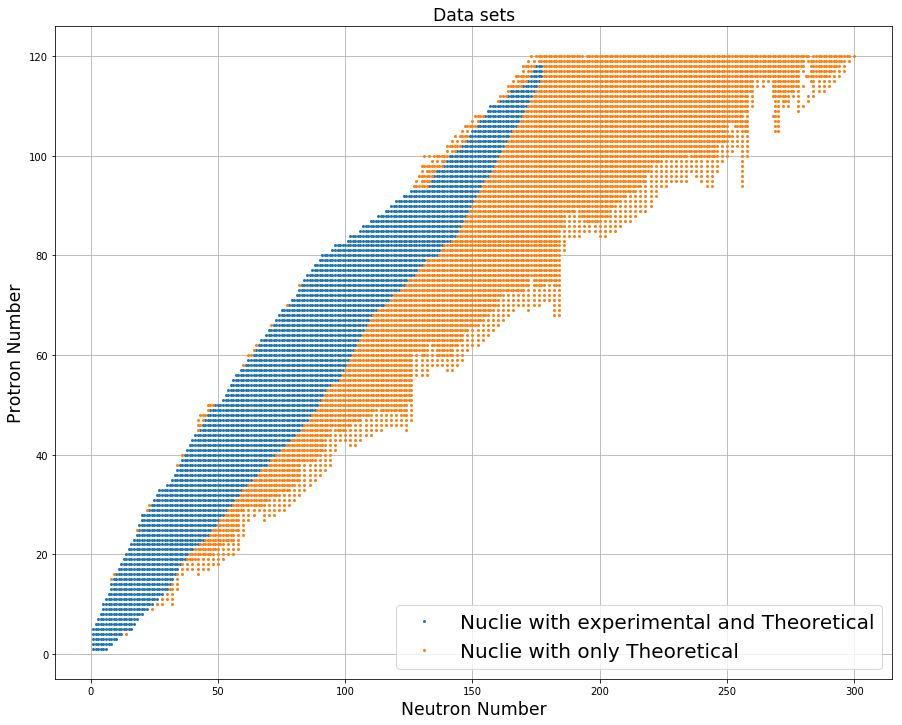

In [8]:
plt.title('Data sets', fontsize='xx-large')
#plt.plot(N_SKMS, Z_SKMS,  'x', markersize=2, label='SKMS')
plt.plot(N_exp,  Z_exp, 'o', markersize=2, label='Nuclie with experimental and Theoretical')
plt.plot(N_nomatSKMS,  Z_nomatSKMS, 'o', markersize=2, label='Nuclie with only Theoretical')

#plt.plot(N_mat,Z_mat,'o', markersize=2)
plt.xlabel('Neutron Number', fontsize='xx-large')
plt.ylabel('Protron Number', fontsize='xx-large')
plt.grid(True)
plt.legend(prop={"size":20})
plt.savefig('In Out SKMS data sets.pdf', format='pdf', bbox_inches='tight', transparent=True)

#plt.title('between SKMS drip lines and 30 to the right and left')
#plt.plot(np.transpose(ndripzdep_SKMS)[0][0:-1], np.transpose(ndripzdep_SKMS)[1][0:-1],label='python neutron drip line')
#plt.plot(np.transpose(zdripndep_SKMS)[1][0:-1], np.transpose(zdripndep_SKMS)[0][0:-1],label='python proton drip line')
#plt.plot(allvals[1][0:-1],allvals[0][0:-1], 'o', markersize=1)
#plt.ylabel('Proton  #')
#plt.xlabel('Neutron #')
#plt.legend()
#plt.show()


In [1]:
fig_size = plt.rcParams["figure.figsize"]
# Prints: [8.0, 6.0]
#print ("Current size:", fig_size)
# Set figure width to 12 and height to 9
fig_size[0] = 7
fig_size[1] =7
plt.rcParams["figure.figsize"] = fig_size


sns.set_style('darkgrid')
sns.distplot(Q_SKMS, label='all Q ')
sns.distplot(Q_matSKMS, label='Q with both experiment and theory')
sns.distplot(Q_nomatSKMS, label='Q with only theorety')
plt.title('Q Value Histogram', fontsize=25, fontweight='bold' )
plt.legend(prop={"size":15})
plt.xlabel("Q value (MeV)", fontsize=25, fontweight='bold')
plt.savefig('Q value histogram.pdf', format='pdf', bbox_inches='tight', transparent=True)


NameError: name 'plt' is not defined

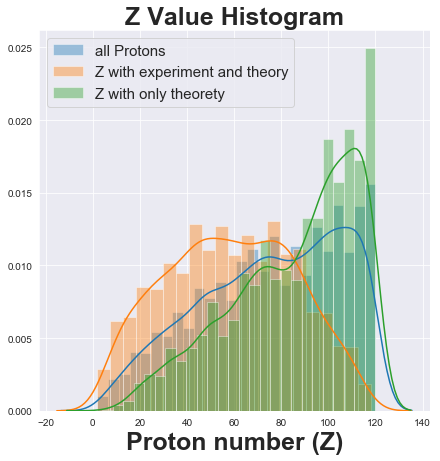

In [24]:
sns.set_style('darkgrid')
sns.distplot(Z_SKMS, label='all Protons')
sns.distplot(Z_mat, label='Z with experiment and theory')
sns.distplot(Z_nomatSKMS, label='Z with only theorety')
plt.title('Z Value Histogram', fontsize=25, fontweight='bold' )

plt.legend(prop={"size":15})
plt.xlabel("Proton number (Z)", fontsize=25, fontweight='bold')
plt.savefig('Z value histogram.pdf', format='pdf', bbox_inches='tight', transparent=True)


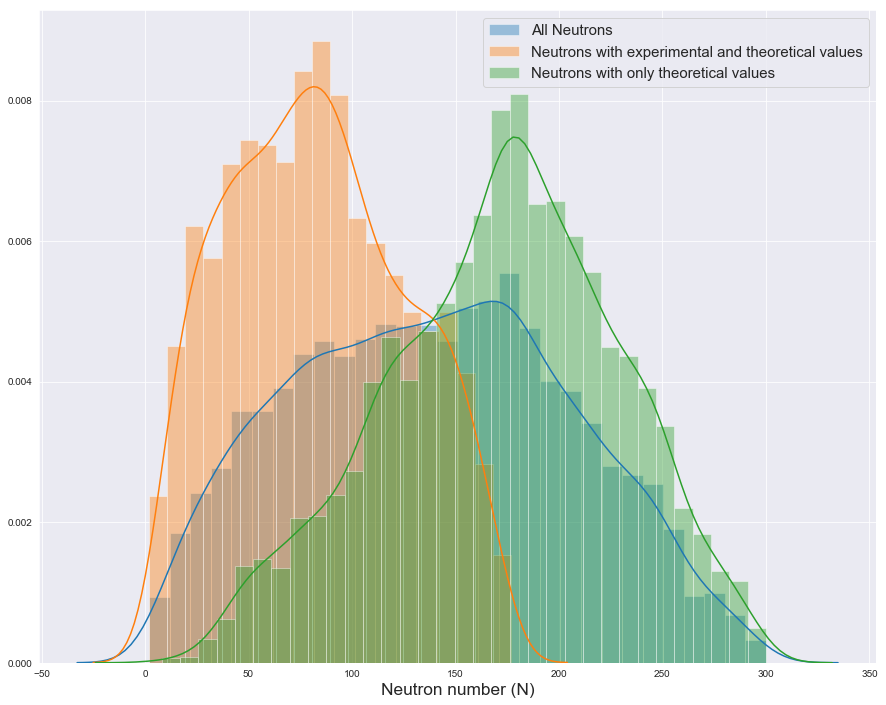

In [23]:
sns.distplot(N_SKMS, label='All Neutrons')
sns.distplot(N_mat, label='Neutrons with experimental and theoretical values')
sns.distplot(N_nomatSKMS, label='Neutrons with only theoretical values')
plt.legend(prop={"size":15})
plt.xlabel("Neutron number (N)", fontsize='xx-large')
plt.savefig('N value histogram.pdf', format='pdf', bbox_inches='tight', transparent=True)



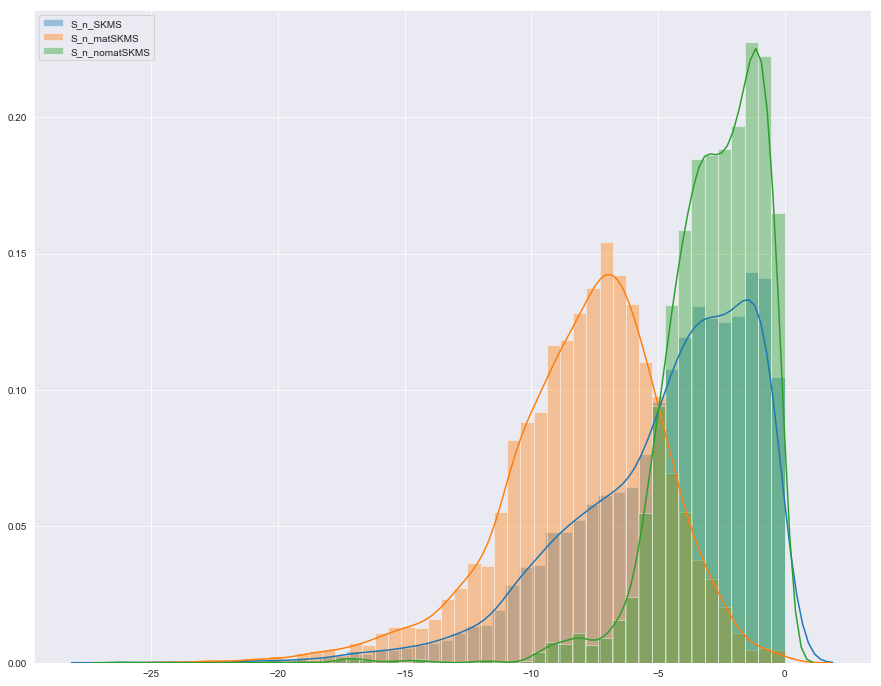

In [11]:
sns.set_style('darkgrid')
sns.distplot(S_n_SKMS, label='S_n_SKMS')
sns.distplot(S_n_matSKMS, label='S_n_matSKMS')
sns.distplot(S_n_nomatSKMS, label='S_n_nomatSKMS')
plt.legend()

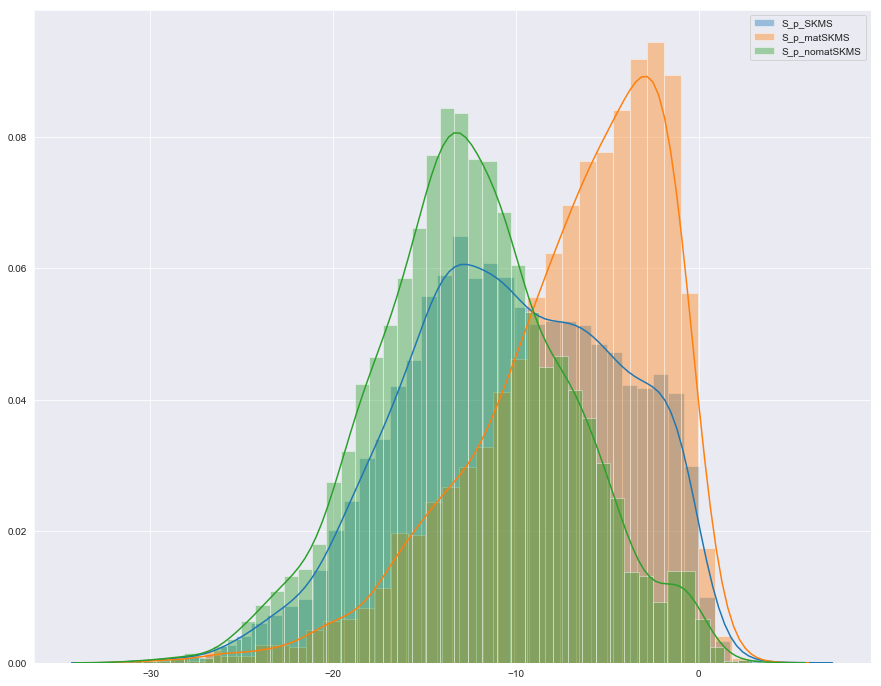

In [12]:
sns.set_style('darkgrid')
sns.distplot(S_p_SKMS, label='S_p_SKMS')
sns.distplot(S_p_matSKMS, label='S_p_matSKMS')
sns.distplot(S_p_nomatSKMS, label='S_p_nomatSKMS')
plt.legend() 

# Applying RF

### NZ, NZQ, ZQ, NQ, NZS, NZSQ, Q. feature evaluation.

In [13]:
def ki(exp, theo):
    ki_2=0
    
    for i in range(0, len(exp)):
        ki_2=ki_2+(exp[i]-theo[i])**2

    return ki_2/len(theo)
    

In [14]:
NZ_mat=np.transpose(np.stack((Z_mat,N_mat)))
NZ_mat=np.array(NZ_mat)

rf_NZ=RandomForestRegressor(n_estimators=1000)

X_train, X_test, y_train, y_test = train_test_split(NZ_mat, diff_mat, test_size =0.25, random_state=42 )
rf_NZ.fit(X_train,y_train)
print(rf_NZ.score(X_train,y_train))
print(rf_NZ.score(X_test,y_test))

diff_NZ=rf_NZ.predict(NZ_SKMS)



0.9991908793613992
0.9927920674523946


In [15]:
NZQ_mat=np.transpose(np.stack((Z_mat,N_mat, Q_matSKMS)))
NZQ_mat=np.array(NZQ_mat)

NZQ_SKMS=np.transpose(np.stack((Z_SKMS,N_SKMS, Q_SKMS)))
NZQ_SKMS=np.array(NZQ_SKMS)

                    
rf_NZQ=RandomForestRegressor(n_estimators=1000)
X_train, X_test, y_train, y_test = train_test_split(NZQ_mat, diff_mat, test_size =0.25) #, random_state=42 )
rf_NZQ.fit(X_train,y_train)
print(rf_NZQ.score(X_train,y_train))
print(rf_NZQ.score(X_test,y_test))

diff_NZQ=rf_NZQ.predict(NZQ_SKMS)


0.9981764718278981
0.9876540211470104


In [16]:
ZQ_mat=np.transpose(np.stack((Z_mat, Q_matSKMS)))
ZQ_mat=np.array(ZQ_mat)

ZQ_SKMS=np.transpose(np.stack((Z_SKMS, Q_SKMS)))
ZQ_SKMS=np.array(ZQ_SKMS)

                    
rf_ZQ=RandomForestRegressor(n_estimators=1000)
X_train, X_test, y_train, y_test = train_test_split(ZQ_mat, diff_mat, test_size =0.25) #, random_state=42 )
rf_ZQ.fit(X_train,y_train)
print(rf_ZQ.score(X_train,y_train))
print(rf_ZQ.score(X_test,y_test))

diff_ZQ=rf_ZQ.predict(ZQ_SKMS)

0.9844544167871867
0.9016237650942807


In [17]:
diff_ZQ_list=[]
err_list=[]
   
    

Sn_2n_SKMS_vals    =[] #n values for all SKMS theoretical values
Sn_SKMS_sep_2n     =[] #SKMS separation values WITHOUT ML

Sn_2n_SKMS_ml_vals =[]
Sn_SKMS_ml_sep_2n  =[] #SKMS separation values WITH ML

Sn_2n_exp_vals     =[] #n values for all Experimental values
Sn_exp_sep_2n      =[] #Experimental separation values 


     
#experimental loop
for i in range(1366,1405):
    Sn_2n_exp_vals.append(N_exp[i])
    Sn_exp_sep_2n.append(-S_2n_exp[i])
    #print('N:', N_exp[i], 'S:', -S_2n_exp[i])

#print('\n')
for i in range(1942, 2022):
    Sn_2n_SKMS_vals.append(N_SKMS[i])
    Sn_SKMS_sep_2n.append(-S_2n_SKMS[i])
    #print('N:', N_SKMS[i], 'S:', -S_2n_SKMS[i])

for i in range(0,10,1):
    #Sn_2n_SKMS_ml_vals=[]
    #Sn_SKMS_ml_sep_2n=[]

    rf_ZQ=RandomForestRegressor(n_estimators=1000)
    X_train, X_test, y_train, y_test = train_test_split(ZQ_mat, diff_mat, test_size =0.25) #, random_state=42 )
    rf_ZQ.fit(X_train,y_train)
    print(rf_ZQ.score(X_train,y_train))
    print(rf_ZQ.score(X_test,y_test))
    diff_ZQ=rf_ZQ.predict(ZQ_SKMS)
    diff_ZQ_list.append(diff_ZQ)
    
    for n in range(45, 127):
        try:
            #finding SKMS separation values with added ml component
            y_now=y_SKMS_d[50,n]+rf_ZQ.predict([[50, Q_SKMS_d[50,n] ]])
            y_previous=y_SKMS_d[50,n-2]+rf_ZQ.predict([[50, Q_SKMS_d[50,n-2] ]])
            #appending theoretical values and their n values to lists
            Sn_2n_SKMS_ml_vals.append(n)
            Sn_SKMS_ml_sep_2n.append(y_now-y_previous)
            #print('N:', n, 'S:', y_now-y_previous)
            #print('N:', n, 'prediction:', rf.predict([[50, n]]), rf.predict([[50, n-2]]) )
            
        except KeyError:
            continue 
    err_list.append([Sn_2n_SKMS_ml_vals, Sn_SKMS_ml_sep_2n])
    Sn_2n_SKMS_ml_vals=[]
    Sn_SKMS_ml_sep_2n=[]
    
    

0.9848224363153162
0.8930644514110213
0.9845757706681486
0.904968394814039
0.9842776978370361
0.8984544379886683
0.9849333391211859
0.8960413192230118
0.985127502472358
0.8969218649808843
0.9855017442524314
0.8869648200395039
0.984977679917036
0.8960572454403556
0.98577565496512
0.8870772415683329
0.983459814040455
0.9074749556163146
0.9843429520869961
0.9058432357585027


In [18]:
#print(err_list)
err_list=np.transpose(err_list)
print(np.shape(err_list))

(78, 2, 10)


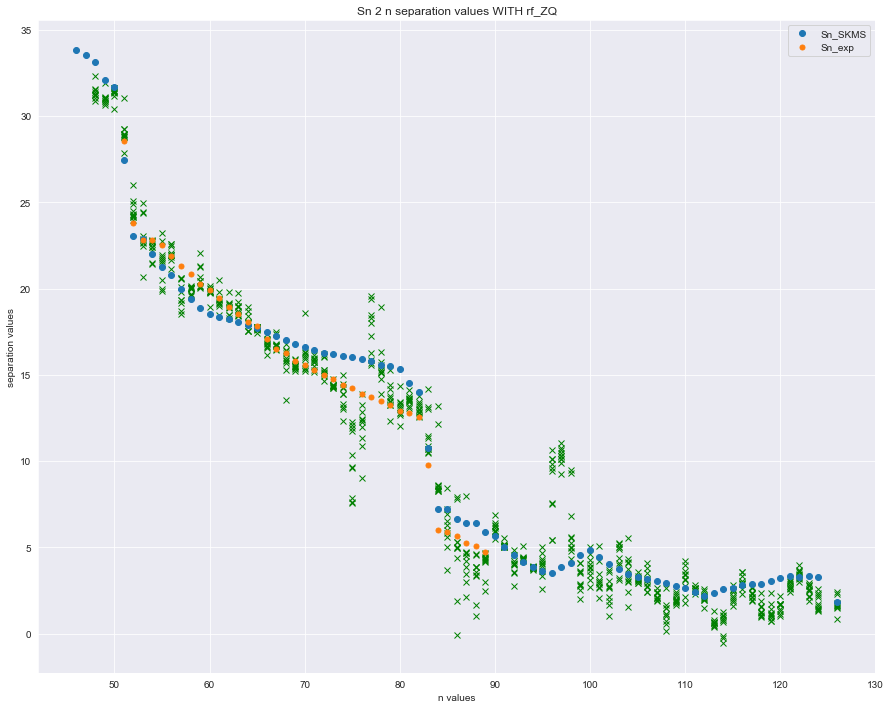

In [19]:
#print(err_list[0])
#print(err_list[0][0])
#print(err_list[0][1])


for i in range(0,78,1):
    plt.plot(err_list[i][0], err_list[i][1], 'x', color='green')


plt.plot(Sn_2n_SKMS_vals,    Sn_SKMS_sep_2n, 'o', label='Sn_SKMS')
#plt.plot(Sn_2n_SKMS_ml_vals, Sn_SKMS_ml_sep_2n, 'x', label='Sn_SKMS_ml')
plt.plot(Sn_2n_exp_vals,     Sn_exp_sep_2n, 'o', markersize=5, label='Sn_exp')
#plt.gca().legend(('SKMS without ml','SKMS with ml','Experimental values'))
plt.title('Sn 2 n separation values WITH rf_ZQ')
plt.xlabel('n values')
plt.ylabel('separation values')
plt.legend()
plt.show()    
    

In [20]:
NQ_mat=np.transpose(np.stack((N_mat, Q_matSKMS)))
NQ_mat=np.array(NQ_mat)


NQ_SKMS=np.transpose(np.stack((N_SKMS, Q_SKMS)))
NQ_SKMS=np.array(NQ_SKMS)

                    
rf_NQ=RandomForestRegressor(n_estimators=1000)
X_train, X_test, y_train, y_test = train_test_split(NQ_mat, diff_mat, test_size =0.25) #, random_state=42 )
rf_NQ.fit(X_train,y_train)
print(rf_NQ.score(X_train,y_train))
print(rf_NQ.score(X_test,y_test))

diff_NQ=rf_NQ.predict(NQ_SKMS)

0.9928695713174687
0.9611502786695486


In [21]:
NZS_mat=np.transpose(np.stack((N_S_n_mat,Z_S_n_mat, S_n_matSKMS)))
NZS_mat=np.array(NZS_mat)

NZS_SKMS=np.transpose(np.stack((N_SKMS, Z_SKMS, S_n_SKMS)))
NZS_SKMS=np.array(NZS_SKMS)

                    
rf_NZS=RandomForestRegressor(n_estimators=1000)
X_train, X_test, y_train, y_test = train_test_split(NZS_mat, diff_S_n_mat, test_size =0.25) #, random_state=42 )
rf_NZS.fit(X_train,y_train)
print(rf_NZS.score(X_train,y_train))
print(rf_NZS.score(X_test,y_test))

diff_NZS=rf_NZS.predict(NZS_SKMS)



0.9973700175264321
0.9843572436754133


In [22]:
NZSQ_mat=np.transpose(np.stack((N_S_n_mat,Z_S_n_mat, S_n_matSKMS, Q_S_n_matSKMS)))
NZSQ_mat=np.array(NZSQ_mat)

NZSQ_SKMS=np.transpose(np.stack((N_SKMS, Z_SKMS, S_n_SKMS, Q_SKMS)))
NZSQ_SKMS=np.array(NZSQ_SKMS)

                    
rf_NZSQ=RandomForestRegressor(n_estimators=1000)
X_train, X_test, y_train, y_test = train_test_split(NZSQ_mat, diff_S_n_mat, test_size =0.25) #, random_state=42 )
rf_NZSQ.fit(X_train,y_train)
print(rf_NZSQ.score(X_train,y_train))
print(rf_NZSQ.score(X_test,y_test))

diff_NZSQ=rf_NZSQ.predict(NZSQ_SKMS)



0.9975147743239201
0.9786184030078577


In [23]:
itmat=[]
it   =[]
for i in range(1,len(Q_matSKMS)+1):
    itmat.append(i)
for i in range(1,len(Q_SKMS)+1):
    it.append(i)
    

Q_mat= np.transpose(np.stack((itmat, Q_matSKMS)))
Q_mat= np.array(Q_mat)

Q_allSKMS=np.transpose(np.stack((it, Q_SKMS)))
Q_allSKMS= np.array(Q_allSKMS)


rf_Q=RandomForestRegressor(n_estimators=1000)
X_train, X_test, y_train, y_test = train_test_split(Q_mat, diff_mat, test_size =0.25) #, random_state=42 )
rf_Q.fit(X_train,y_train)
print(rf_Q.score(X_train,y_train))
print(rf_Q.score(X_test,y_test))


diff_Q=rf_Q.predict(Q_allSKMS)

0.994643887983282
0.9682068084190129


Plotting the rf predictions for all the different feature combinations.  

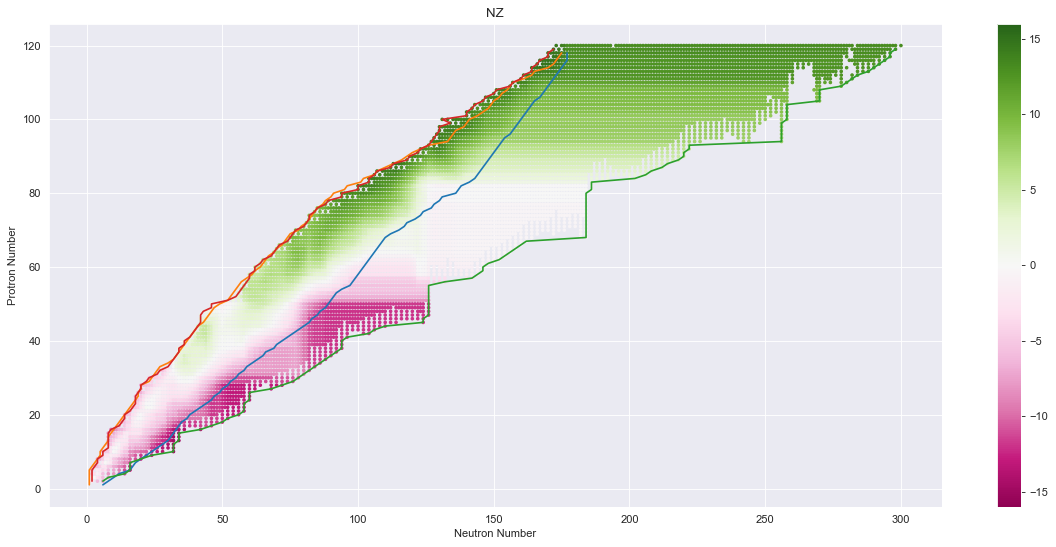

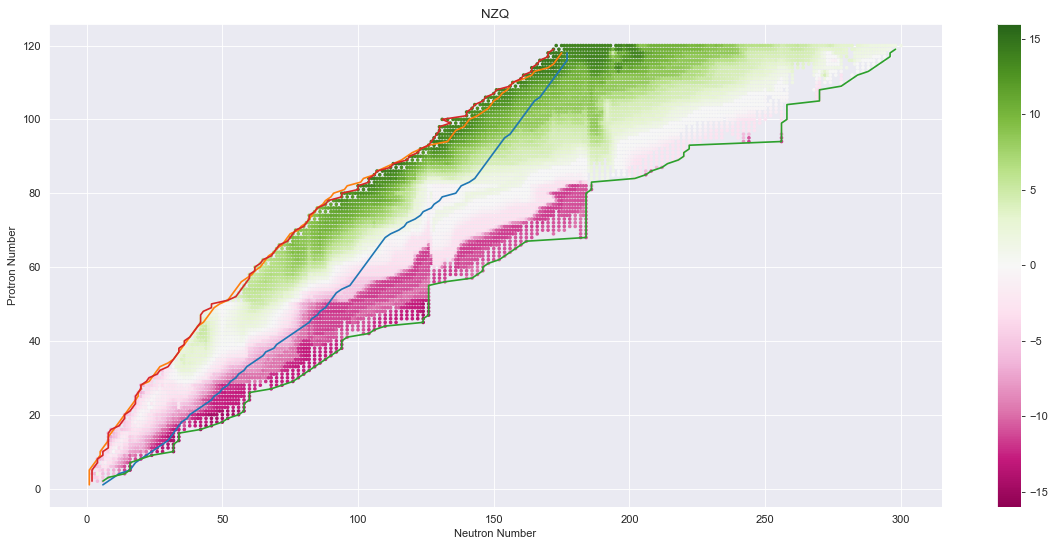

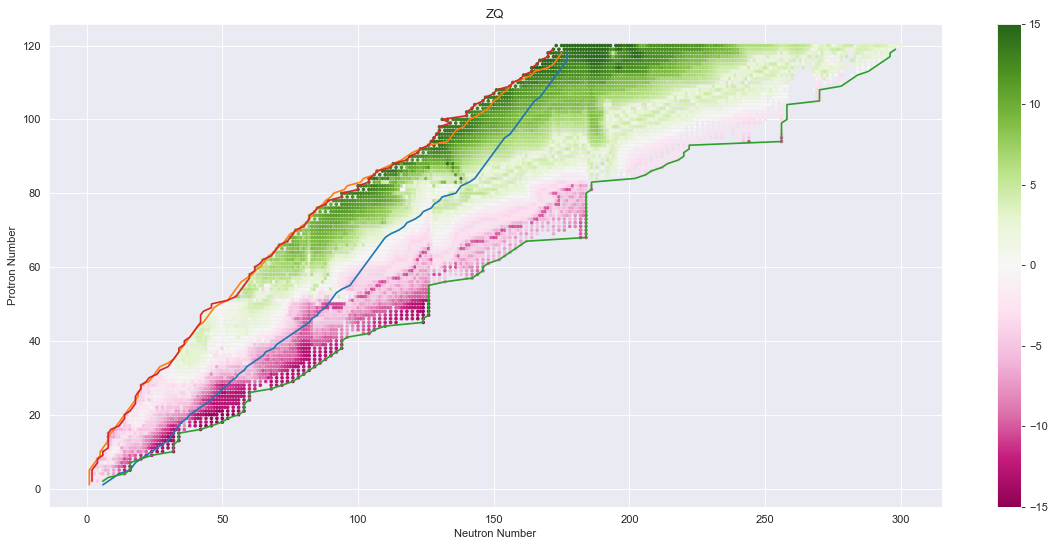

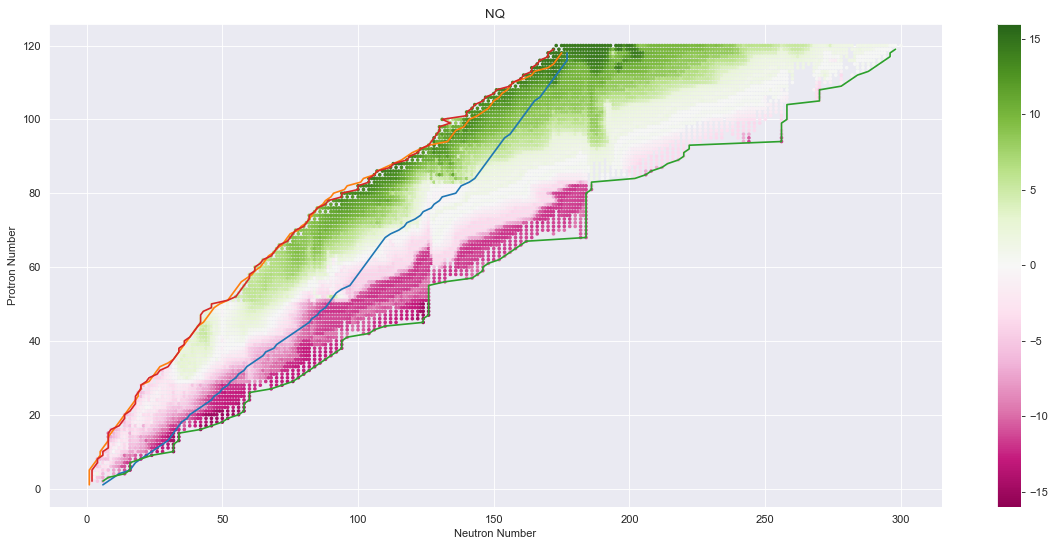

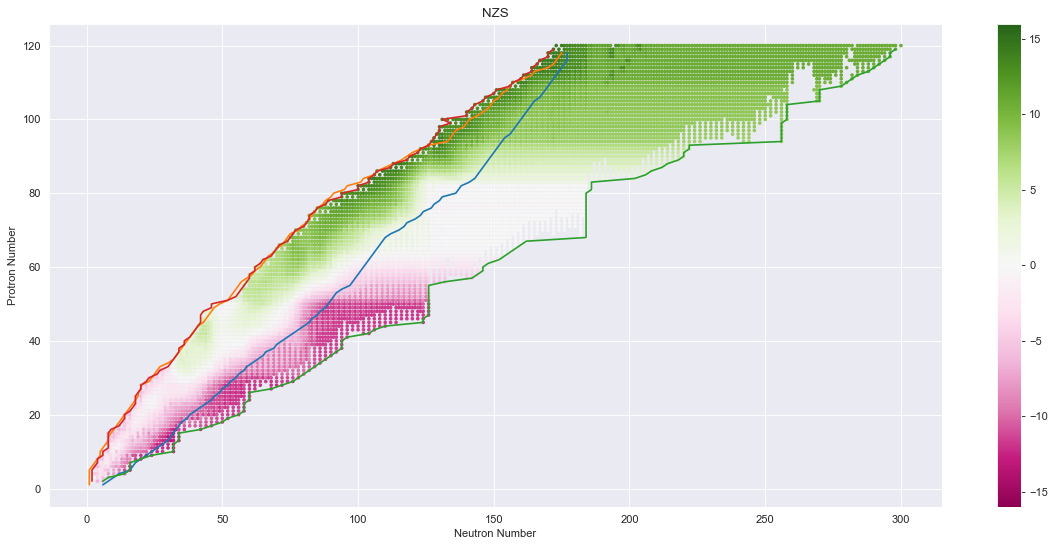

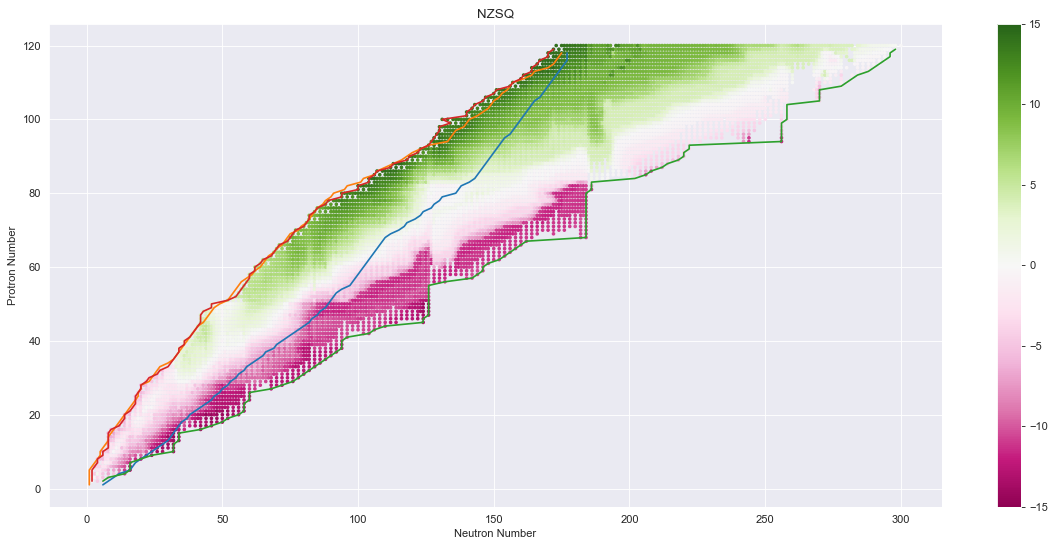

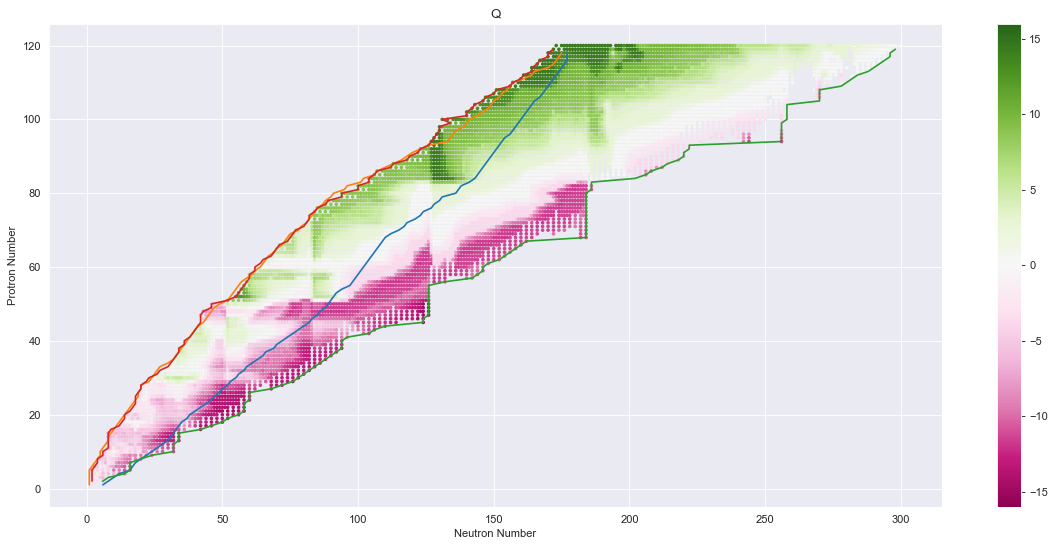

In [25]:
ext = np.int(np.ceil(max(-np.min(diff_NZ),np.max(diff_NZ))))
fig=plt.figure(figsize=(18, 8), dpi= 80, facecolor='w', edgecolor='k')
sc = plt.scatter(N_SKMS,Z_SKMS,c=diff_NZ,cmap='PiYG',vmin=-ext,vmax=ext,s=5)
plt.plot(np.transpose(ndripzdep_exp)[0], np.transpose(ndripzdep_exp)[1],label='python neutron drip line')
plt.plot(np.transpose(zdripndep_exp)[1], np.transpose(zdripndep_exp)[0],label='python proton drip line')
plt.plot(np.transpose(ndripzdep_SKMS)[0][0:-1], np.transpose(ndripzdep_SKMS)[1][0:-1],label='python neutron drip line')
plt.plot(np.transpose(zdripndep_SKMS)[1][0:-1], np.transpose(zdripndep_SKMS)[0][0:-1],label='python proton drip line')
plt.title('NZ')
plt.xlabel('Neutron Number')
plt.ylabel('Protron Number')
plt.colorbar(sc)
plt.show()


ext = np.int(np.ceil(max(-np.min(diff_NZQ),np.max(diff_NZQ))))
fig=plt.figure(figsize=(18, 8), dpi= 80, facecolor='w', edgecolor='k')
sc = plt.scatter(N_SKMS,Z_SKMS,c=diff_NZQ,cmap='PiYG',vmin=-ext,vmax=ext,s=5)
plt.plot(np.transpose(ndripzdep_exp)[0], np.transpose(ndripzdep_exp)[1],label='python neutron drip line')
plt.plot(np.transpose(zdripndep_exp)[1], np.transpose(zdripndep_exp)[0],label='python proton drip line')
plt.plot(np.transpose(ndripzdep_SKMS)[0][0:-1], np.transpose(ndripzdep_SKMS)[1][0:-1],label='python neutron drip line')
plt.plot(np.transpose(zdripndep_SKMS)[1][0:-1], np.transpose(zdripndep_SKMS)[0][0:-1],label='python proton drip line')
plt.title('NZQ')
plt.xlabel('Neutron Number')
plt.ylabel('Protron Number')
plt.colorbar(sc)
plt.show()


ext = np.int(np.ceil(max(-np.min(diff_ZQ),np.max(diff_ZQ))))
fig=plt.figure(figsize=(18, 8), dpi= 80, facecolor='w', edgecolor='k')
sc = plt.scatter(N_SKMS,Z_SKMS,c=diff_ZQ,cmap='PiYG',vmin=-ext,vmax=ext,s=5)
plt.plot(np.transpose(ndripzdep_exp)[0], np.transpose(ndripzdep_exp)[1],label='python neutron drip line')
plt.plot(np.transpose(zdripndep_exp)[1], np.transpose(zdripndep_exp)[0],label='python proton drip line')
plt.plot(np.transpose(ndripzdep_SKMS)[0][0:-1], np.transpose(ndripzdep_SKMS)[1][0:-1],label='python neutron drip line')
plt.plot(np.transpose(zdripndep_SKMS)[1][0:-1], np.transpose(zdripndep_SKMS)[0][0:-1],label='python proton drip line')
plt.title('ZQ')
plt.xlabel('Neutron Number')
plt.ylabel('Protron Number')
plt.colorbar(sc)
plt.show()


ext = np.int(np.ceil(max(-np.min(diff_NQ),np.max(diff_NQ))))
fig=plt.figure(figsize=(18, 8), dpi= 80, facecolor='w', edgecolor='k')
sc = plt.scatter(N_SKMS,Z_SKMS,c=diff_NQ,cmap='PiYG',vmin=-ext,vmax=ext,s=5)
plt.plot(np.transpose(ndripzdep_exp)[0], np.transpose(ndripzdep_exp)[1],label='python neutron drip line')
plt.plot(np.transpose(zdripndep_exp)[1], np.transpose(zdripndep_exp)[0],label='python proton drip line')
plt.plot(np.transpose(ndripzdep_SKMS)[0][0:-1], np.transpose(ndripzdep_SKMS)[1][0:-1],label='python neutron drip line')
plt.plot(np.transpose(zdripndep_SKMS)[1][0:-1], np.transpose(zdripndep_SKMS)[0][0:-1],label='python proton drip line')
plt.title('NQ')
plt.xlabel('Neutron Number')
plt.ylabel('Protron Number')
plt.colorbar(sc)
plt.show()


ext = np.int(np.ceil(max(-np.min(diff_NZS),np.max(diff_NZS))))
fig=plt.figure(figsize=(18, 8), dpi= 80, facecolor='w', edgecolor='k')
sc = plt.scatter(N_SKMS,Z_SKMS,c=diff_NZS,cmap='PiYG',vmin=-ext,vmax=ext,s=5)
plt.plot(np.transpose(ndripzdep_exp)[0], np.transpose(ndripzdep_exp)[1],label='python neutron drip line')
plt.plot(np.transpose(zdripndep_exp)[1], np.transpose(zdripndep_exp)[0],label='python proton drip line')
plt.plot(np.transpose(ndripzdep_SKMS)[0][0:-1], np.transpose(ndripzdep_SKMS)[1][0:-1],label='python neutron drip line')
plt.plot(np.transpose(zdripndep_SKMS)[1][0:-1], np.transpose(zdripndep_SKMS)[0][0:-1],label='python proton drip line')
plt.title('NZS')
plt.xlabel('Neutron Number')
plt.ylabel('Protron Number')
plt.colorbar(sc)
plt.show()


ext = np.int(np.ceil(max(-np.min(diff_NZSQ),np.max(diff_NZSQ))))
fig=plt.figure(figsize=(18, 8), dpi= 80, facecolor='w', edgecolor='k')
sc = plt.scatter(N_SKMS,Z_SKMS,c=diff_NZSQ,cmap='PiYG',vmin=-ext,vmax=ext,s=5)
plt.plot(np.transpose(ndripzdep_exp)[0], np.transpose(ndripzdep_exp)[1],label='python neutron drip line')
plt.plot(np.transpose(zdripndep_exp)[1], np.transpose(zdripndep_exp)[0],label='python proton drip line')
plt.plot(np.transpose(ndripzdep_SKMS)[0][0:-1], np.transpose(ndripzdep_SKMS)[1][0:-1],label='python neutron drip line')
plt.plot(np.transpose(zdripndep_SKMS)[1][0:-1], np.transpose(zdripndep_SKMS)[0][0:-1],label='python proton drip line')
plt.title('NZSQ')
plt.xlabel('Neutron Number')
plt.ylabel('Protron Number')
plt.colorbar(sc)
plt.show()


ext = np.int(np.ceil(max(-np.min(diff_Q),np.max(diff_Q))))
fig=plt.figure(figsize=(18, 8), dpi= 80, facecolor='w', edgecolor='k')
sc = plt.scatter(N_SKMS,Z_SKMS,c=diff_Q,cmap='PiYG',vmin=-ext,vmax=ext,s=5)
plt.plot(np.transpose(ndripzdep_exp)[0], np.transpose(ndripzdep_exp)[1],label='python neutron drip line')
plt.plot(np.transpose(zdripndep_exp)[1], np.transpose(zdripndep_exp)[0],label='python proton drip line')
plt.plot(np.transpose(ndripzdep_SKMS)[0][0:-1], np.transpose(ndripzdep_SKMS)[1][0:-1],label='python neutron drip line')
plt.plot(np.transpose(zdripndep_SKMS)[1][0:-1], np.transpose(zdripndep_SKMS)[0][0:-1],label='python proton drip line')
plt.title('Q')
plt.xlabel('Neutron Number')
plt.ylabel('Protron Number')
plt.colorbar(sc)
plt.show()




# Evaluating the rfs at magic number interals

# Using rf_NZ

In [ ]:
Sn_2n_SKMS_vals    =[] #n values for all SKMS theoretical values
Sn_SKMS_sep_2n     =[] #SKMS separation values WITHOUT ML

Sn_2n_exp_vals     =[] #n values for all Experimental values
Sn_exp_sep_2n      =[] #Experimental separation values 

#experimental loop
for i in range(1366,1405):
    Sn_2n_exp_vals.append(N_exp[i])
    Sn_exp_sep_2n.append(-S_2n_exp[i])
    #print('N:', N_exp[i], 'S:', -S_2n_exp[i])

#print('\n')
for i in range(1942, 2022):
    Sn_2n_SKMS_vals.append(N_SKMS[i])
    Sn_SKMS_sep_2n.append(-S_2n_SKMS[i])
    #print('N:', N_SKMS[i], 'S:', -S_2n_SKMS[i])

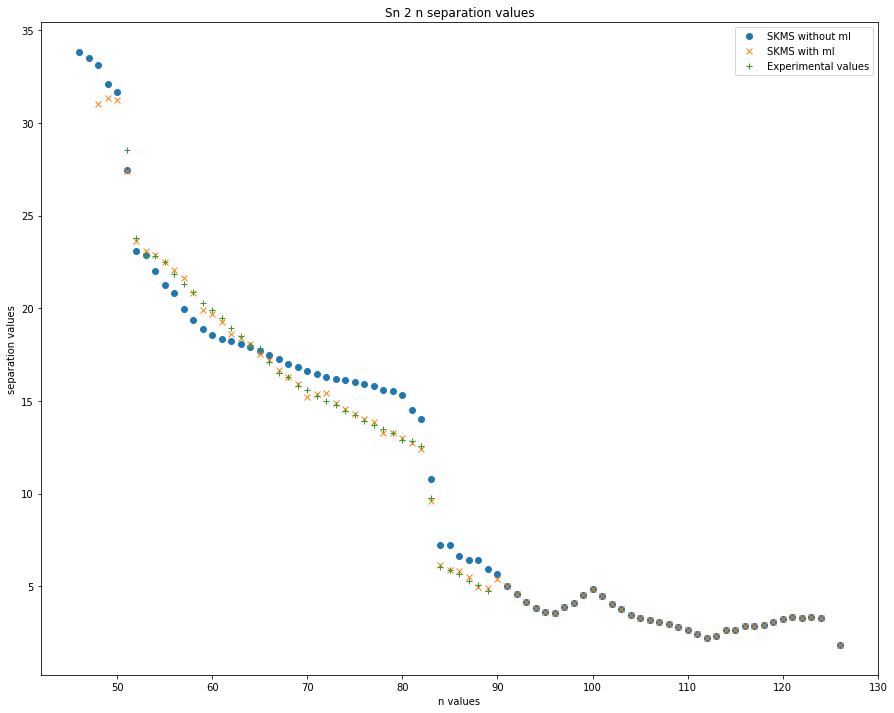

In [20]:
    
    
Sn_2n_SKMS_ml_vals =[]
Sn_SKMS_ml_sep_2n  =[] #SKMS separation values WITH ML

#print('\n')
for n in range(45, 127):
    try:
        #finding SKMS separation values with added ml component
        y_now=y_SKMS_d[50,n]+rf_NZ.predict([[50, n]])
        y_previous=y_SKMS_d[50,n-2]+rf_NZ.predict([[50, n-2]])
        #appending theoretical values and their n values to lists
        Sn_2n_SKMS_ml_vals.append(n)
        Sn_SKMS_ml_sep_2n.append(y_now-y_previous)
        #print('N:', n, 'S:', y_now-y_previous)
        #print('N:', n, 'prediction:', rf.predict([[50, n]]), rf.predict([[50, n-2]]) )

    except KeyError:
        continue   



plt.plot(Sn_2n_SKMS_vals,    Sn_SKMS_sep_2n, 'o')
plt.plot(Sn_2n_SKMS_ml_vals, Sn_SKMS_ml_sep_2n, 'x')
plt.plot(Sn_2n_exp_vals,     Sn_exp_sep_2n, '+')
plt.gca().legend(('SKMS without ml','SKMS with ml','Experimental values'))
plt.title('Sn 2 n separation values')
plt.xlabel('n values')
plt.ylabel('separation values')
plt.show()

# Using rf_NQ

2N Separation Energy

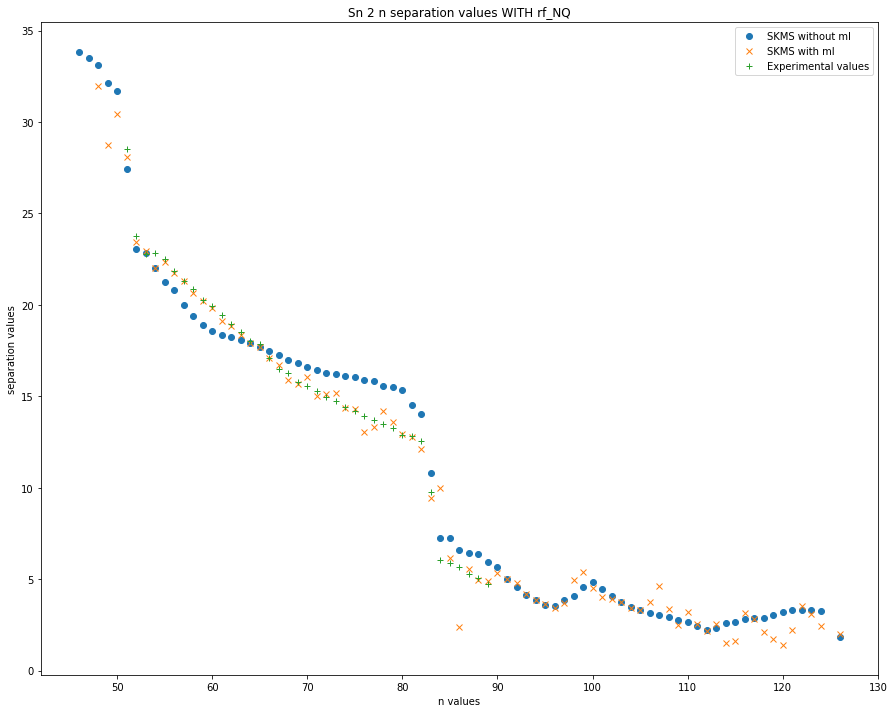

In [24]:
Sn_2n_SKMS_vals    =[] #n values for all SKMS theoretical values
Sn_SKMS_sep_2n     =[] #SKMS separation values WITHOUT ML

Sn_2n_SKMS_ml_vals =[]
Sn_SKMS_ml_sep_2n  =[] #SKMS separation values WITH ML

Sn_2n_exp_vals     =[] #n values for all Experimental values
Sn_exp_sep_2n      =[] #Experimental separation values 




#experimental loop
for i in range(1366,1405):
    Sn_2n_exp_vals.append(N_exp[i])
    Sn_exp_sep_2n.append(-S_2n_exp[i])
    #print('N:', N_exp[i], 'S:', -S_2n_exp[i])

#print('\n')
for i in range(1942, 2022):
    Sn_2n_SKMS_vals.append(N_SKMS[i])
    Sn_SKMS_sep_2n.append(-S_2n_SKMS[i])
    #print('N:', N_SKMS[i], 'S:', -S_2n_SKMS[i])

#print('\n')
for n in range(45, 127):
    try:
        #finding SKMS separation values with added ml component
        y_now=y_SKMS_d[50,n]+rf_NQ.predict([[n, Q_SKMS_d[50,n] ]])
        y_previous=y_SKMS_d[50,n-2]+rf_NQ.predict([[n-2, Q_SKMS_d[50,n-2] ]])
        #appending theoretical values and their n values to lists
        Sn_2n_SKMS_ml_vals.append(n)
        Sn_SKMS_ml_sep_2n.append(y_now-y_previous)
        #print('N:', n, 'S:', y_now-y_previous)
        #print('N:', n, 'prediction:', rf.predict([[50, n]]), rf.predict([[50, n-2]]) )

    except KeyError:
        continue   



plt.plot(Sn_2n_SKMS_vals,    Sn_SKMS_sep_2n, 'o')
plt.plot(Sn_2n_SKMS_ml_vals, Sn_SKMS_ml_sep_2n, 'x')
plt.plot(Sn_2n_exp_vals,     Sn_exp_sep_2n, '+')
plt.gca().legend(('SKMS without ml','SKMS with ml','Experimental values'))
plt.title('Sn 2 n separation values WITH rf_NQ')
plt.xlabel('n values')
plt.ylabel('separation values')
plt.show()

# Using rf_ZQ

2 N Separation Energy

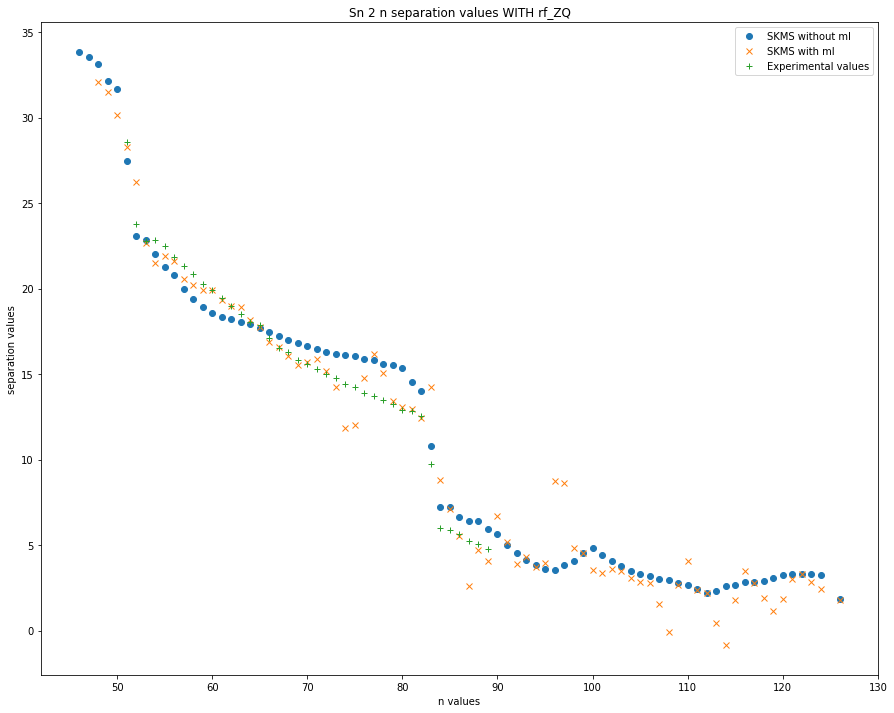

In [25]:
Sn_2n_SKMS_vals    =[] #n values for all SKMS theoretical values
Sn_SKMS_sep_2n     =[] #SKMS separation values WITHOUT ML

Sn_2n_SKMS_ml_vals =[]
Sn_SKMS_ml_sep_2n  =[] #SKMS separation values WITH ML

Sn_2n_exp_vals     =[] #n values for all Experimental values
Sn_exp_sep_2n      =[] #Experimental separation values 




#experimental loop
for i in range(1366,1405):
    Sn_2n_exp_vals.append(N_exp[i])
    Sn_exp_sep_2n.append(-S_2n_exp[i])
    #print('N:', N_exp[i], 'S:', -S_2n_exp[i])

#print('\n')
for i in range(1942, 2022):
    Sn_2n_SKMS_vals.append(N_SKMS[i])
    Sn_SKMS_sep_2n.append(-S_2n_SKMS[i])
    #print('N:', N_SKMS[i], 'S:', -S_2n_SKMS[i])

#print('\n')
for n in range(45, 127):
    try:
        #finding SKMS separation values with added ml component
        y_now=y_SKMS_d[50,n]+rf_ZQ.predict([[50, Q_SKMS_d[50,n] ]])
        y_previous=y_SKMS_d[50,n-2]+rf_ZQ.predict([[50, Q_SKMS_d[50,n-2] ]])
        #appending theoretical values and their n values to lists
        Sn_2n_SKMS_ml_vals.append(n)
        Sn_SKMS_ml_sep_2n.append(y_now-y_previous)
        #print('N:', n, 'S:', y_now-y_previous)
        #print('N:', n, 'prediction:', rf.predict([[50, n]]), rf.predict([[50, n-2]]) )

    except KeyError:
        continue   



plt.plot(Sn_2n_SKMS_vals,    Sn_SKMS_sep_2n, 'o')
plt.plot(Sn_2n_SKMS_ml_vals, Sn_SKMS_ml_sep_2n, 'x')
plt.plot(Sn_2n_exp_vals,     Sn_exp_sep_2n, '+')
plt.gca().legend(('SKMS without ml','SKMS with ml','Experimental values'))
plt.title('Sn 2 n separation values WITH rf_ZQ')
plt.xlabel('n values')
plt.ylabel('separation values')
plt.show()

# using rf_NZQ

2 N Separation Energy

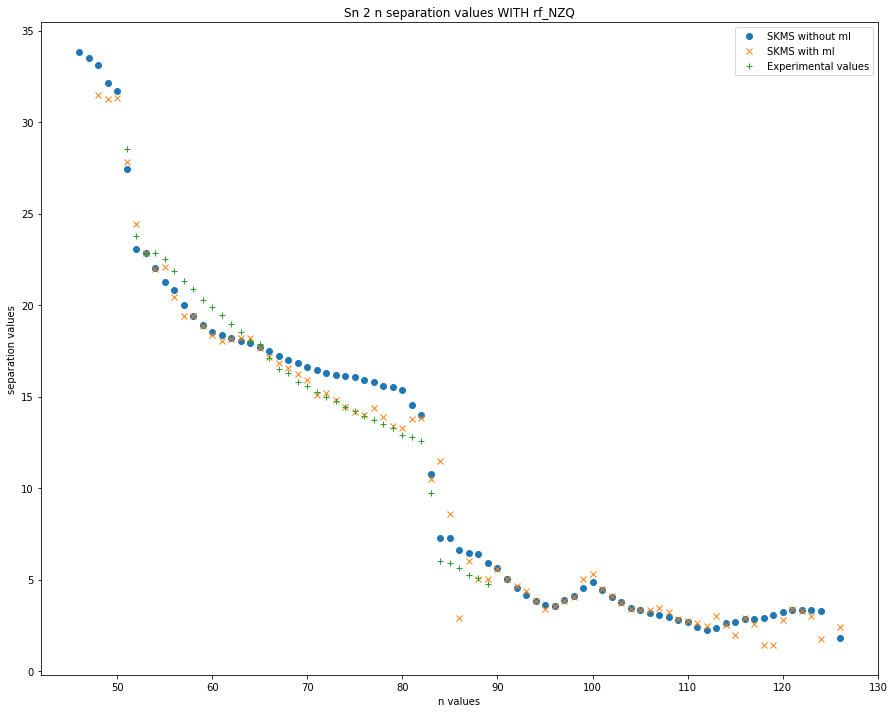

In [32]:
Sn_2n_SKMS_vals    =[] #n values for all SKMS theoretical values
Sn_SKMS_sep_2n     =[] #SKMS separation values WITHOUT ML

Sn_2n_SKMS_ml_vals =[]
Sn_SKMS_ml_sep_2n  =[] #SKMS separation values WITH ML

Sn_2n_exp_vals     =[] #n values for all Experimental values
Sn_exp_sep_2n      =[] #Experimental separation values 


Z_mat,N_mat, Q_matSKMS

#experimental loop
for i in range(1366,1405):
    Sn_2n_exp_vals.append(N_exp[i])
    Sn_exp_sep_2n.append(-S_2n_exp[i])
    #print('N:', N_exp[i], 'S:', -S_2n_exp[i])

#print('\n')
for i in range(1942, 2022):
    Sn_2n_SKMS_vals.append(N_SKMS[i])
    Sn_SKMS_sep_2n.append(-S_2n_SKMS[i])
    #print('N:', N_SKMS[i], 'S:', -S_2n_SKMS[i])

#print('\n')
for n in range(45, 127):
    try:
        #finding SKMS separation values with added ml component
        y_now=y_SKMS_d[50,n]+rf_NZQ.predict([[50, n, Q_SKMS_d[50,n] ]])
        y_previous=y_SKMS_d[50,n-2]+rf_NZQ.predict([[50, n, Q_SKMS_d[50,n-2] ]])
        #appending theoretical values and their n values to lists
        Sn_2n_SKMS_ml_vals.append(n)
        Sn_SKMS_ml_sep_2n.append(y_now-y_previous)
        #print('N:', n, 'S:', y_now-y_previous)
        #print('N:', n, 'prediction:', rf.predict([[50, n]]), rf.predict([[50, n-2]]) )

    except KeyError:
        continue   



plt.plot(Sn_2n_SKMS_vals,    Sn_SKMS_sep_2n, 'o')
plt.plot(Sn_2n_SKMS_ml_vals, Sn_SKMS_ml_sep_2n, 'x')
plt.plot(Sn_2n_exp_vals,     Sn_exp_sep_2n, '+')
plt.gca().legend(('SKMS without ml','SKMS with ml','Experimental values'))
plt.title('Sn 2 n separation values WITH rf_NZQ')
plt.xlabel('n values')
plt.ylabel('separation values')
plt.show()

# Using rf_Q

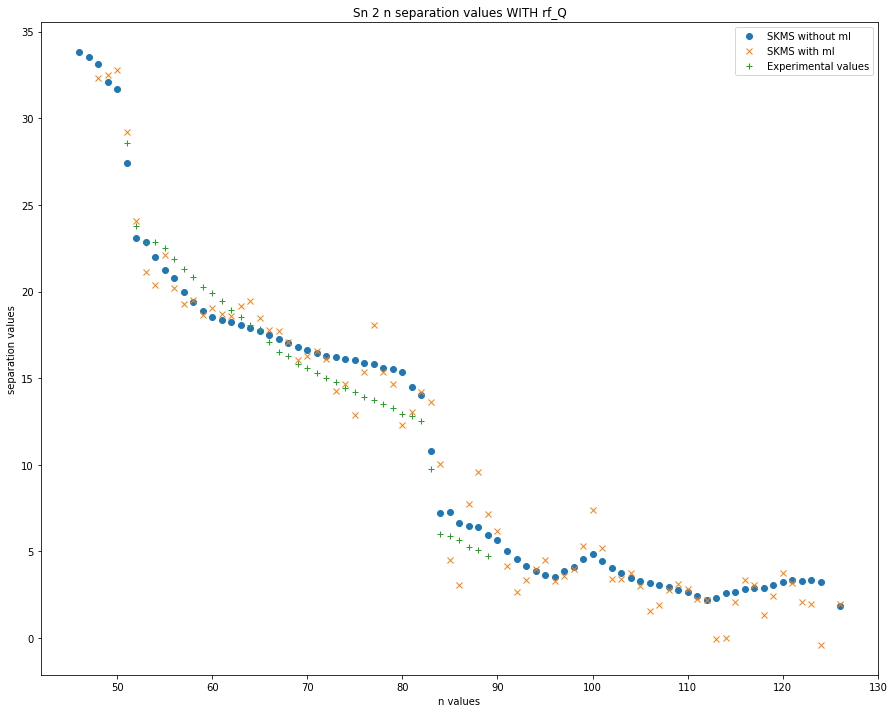

In [31]:

Sn_2n_SKMS_vals    =[] #n values for all SKMS theoretical values
Sn_SKMS_sep_2n     =[] #SKMS separation values WITHOUT ML

Sn_2n_SKMS_ml_vals =[]
Sn_SKMS_ml_sep_2n  =[] #SKMS separation values WITH ML

Sn_2n_exp_vals     =[] #n values for all Experimental values
Sn_exp_sep_2n      =[] #Experimental separation values 


Z_mat,N_mat, Q_matSKMS

#experimental loop
for i in range(1366,1405):
    Sn_2n_exp_vals.append(N_exp[i])
    Sn_exp_sep_2n.append(-S_2n_exp[i])
    #print('N:', N_exp[i], 'S:', -S_2n_exp[i])

#print('\n')
for i in range(1942, 2022):
    Sn_2n_SKMS_vals.append(N_SKMS[i])
    Sn_SKMS_sep_2n.append(-S_2n_SKMS[i])
    #print('N:', N_SKMS[i], 'S:', -S_2n_SKMS[i])

#print('\n')
for n in range(45, 127):
    try:
        #finding SKMS separation values with added ml component
        y_now=y_SKMS_d[50,n]+rf_Q.predict([[n, Q_SKMS_d[50,n] ]])
        y_previous=y_SKMS_d[50,n-2]+rf_Q.predict([[n-2, Q_SKMS_d[50,n-2] ]])
        #appending theoretical values and their n values to lists
        Sn_2n_SKMS_ml_vals.append(n)
        Sn_SKMS_ml_sep_2n.append(y_now-y_previous)
        #print('N:', n, 'S:', y_now-y_previous)
        #print('N:', n, 'prediction:', rf.predict([[50, n]]), rf.predict([[50, n-2]]) )

    except KeyError:
        continue   



plt.plot(Sn_2n_SKMS_vals,    Sn_SKMS_sep_2n, 'o')
plt.plot(Sn_2n_SKMS_ml_vals, Sn_SKMS_ml_sep_2n, 'x')
plt.plot(Sn_2n_exp_vals,     Sn_exp_sep_2n, '+')
plt.gca().legend(('SKMS without ml','SKMS with ml','Experimental values'))
plt.title('Sn 2 n separation values WITH rf_Q')
plt.xlabel('n values')
plt.ylabel('separation values')
plt.show()

# Separation Energy

N Separation Energy

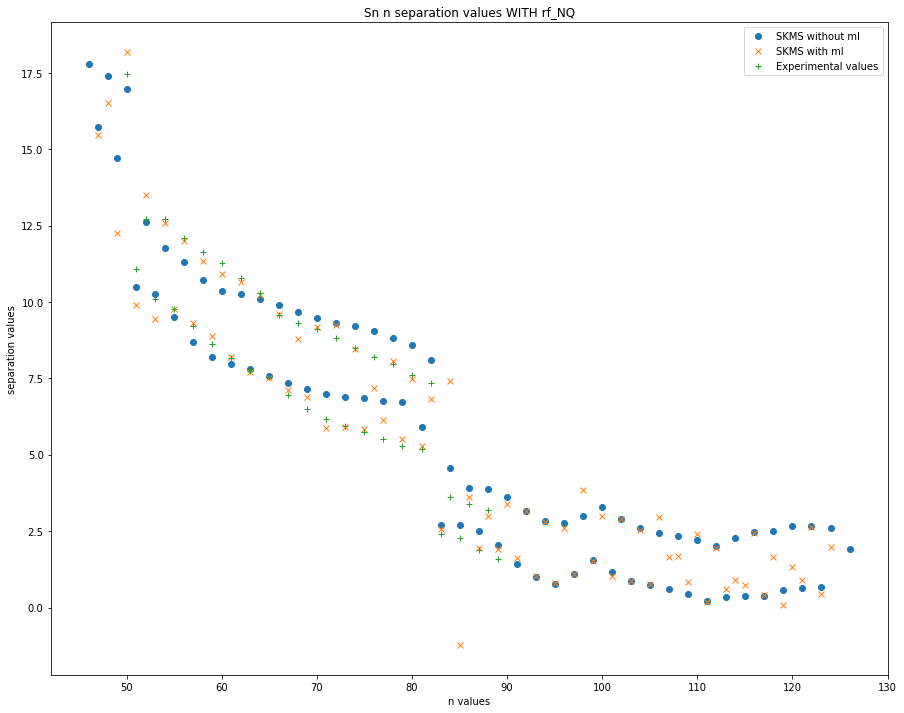

In [21]:
Sn_n_SKMS_vals    =[] #n values for all SKMS theoretical values
Sn_SKMS_sep_n     =[] #SKMS separation values WITHOUT ML

Sn_n_SKMS_ml_vals =[]
Sn_SKMS_ml_sep_n  =[] #SKMS separation values WITH ML

Sn_n_exp_vals     =[] #n values for all Experimental values
Sn_exp_sep_n      =[] #Experimental separation values 




#experimental loop
for i in range(1365,1405):
    Sn_n_exp_vals.append(N_exp[i])
    Sn_exp_sep_n.append(-S_n_exp[i])
    #print('N:', N_exp[i], 'S:', -S_n_exp[i])

#print('\n')
for i in range(1942, 2022):
    Sn_n_SKMS_vals.append(N_SKMS[i])
    Sn_SKMS_sep_n.append(-S_n_SKMS[i])
    #print('N:', N_SKMS[i], 'S:', -S_n_SKMS[i])

#print('\n')
for n in range(45, 127):
    try:
        #finding SKMS separation values with added ml component
        
        
        y_now=y_SKMS_d[50,n]+rf_NQ.predict([[n, Q_SKMS_d[50,n] ]])
        y_previous=y_SKMS_d[50,n-1]+rf_NQ.predict([[n-1, Q_SKMS_d[50,n-1]  ]])
        
        
        #appending theoretical values and their n values to lists
        Sn_n_SKMS_ml_vals.append(n)
        Sn_SKMS_ml_sep_n.append(y_now-y_previous)
        #print('N:', n, 'S:', y_now-y_previous)

    except KeyError:
        continue  
        

plt.plot(Sn_n_SKMS_vals,    Sn_SKMS_sep_n, 'o')
plt.plot(Sn_n_SKMS_ml_vals, Sn_SKMS_ml_sep_n, 'x')
plt.plot(Sn_n_exp_vals,     Sn_exp_sep_n, '+')
plt.gca().legend(('SKMS without ml','SKMS with ml','Experimental values'))
plt.title('Sn n separation values WITH rf_NQ')
plt.xlabel('n values')
plt.ylabel('separation values')
plt.show()


In [18]:
Sn_n_SKMS_vals    =[] #n values for all SKMS theoretical values
Sn_SKMS_sep_n     =[] #SKMS separation values WITHOUT ML

Sn_n_SKMS_ml_vals =[]
Sn_SKMS_ml_sep_n  =[] #SKMS separation values WITH ML

Sn_n_exp_vals     =[] #n values for all Experimental values
Sn_exp_sep_n      =[] #Experimental separation values 




#experimental loop
for i in range(1365,1405):
    Sn_n_exp_vals.append(N_exp[i])
    Sn_exp_sep_n.append(-S_n_exp[i])
    #print('N:', N_exp[i], 'S:', -S_n_exp[i])

#print('\n')
for i in range(1942, 2022):
    Sn_n_SKMS_vals.append(N_SKMS[i])
    Sn_SKMS_sep_n.append(-S_n_SKMS[i])
    #print('N:', N_SKMS[i], 'S:', -S_n_SKMS[i])

#print('\n')
for n in range(45, 127):
    try:
        #finding SKMS separation values with added ml component
        y_now=y_SKMS_d[50,n]+rf_NZ.predict([[50, n]])
        y_previous=y_SKMS_d[50,n-1]+rf_NZ.predict([[50, n-1]])
        #appending theoretical values and their n values to lists
        Sn_n_SKMS_ml_vals.append(n)
        Sn_SKMS_ml_sep_n.append(y_now-y_previous)
        #print('N:', n, 'S:', y_now-y_previous)

    except KeyError:
        continue   


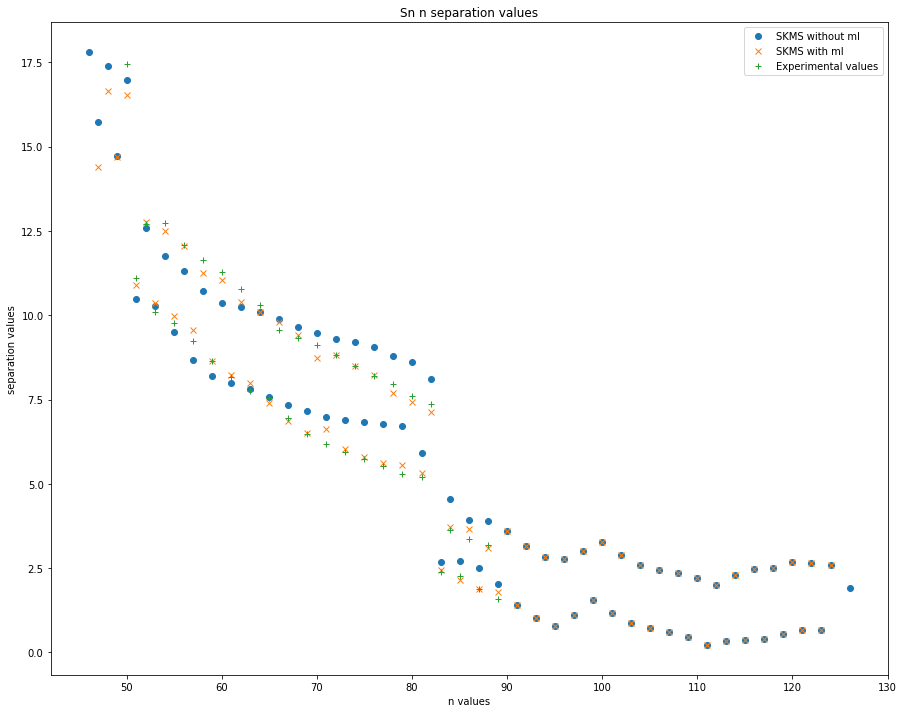

In [19]:

plt.plot(Sn_n_SKMS_vals,    Sn_SKMS_sep_n, 'o')
plt.plot(Sn_n_SKMS_ml_vals, Sn_SKMS_ml_sep_n, 'x')
plt.plot(Sn_n_exp_vals,     Sn_exp_sep_n, '+')
plt.gca().legend(('SKMS without ml','SKMS with ml','Experimental values'))
plt.title('Sn n separation values')
plt.xlabel('n values')
plt.ylabel('separation values')
plt.show()


# Ca Evaluation

In [68]:
# 1 N Separation Energy Values

Ca_n_exp_vals     =[] #n values for all Experimental values
Ca_exp_sep_n      =[] #Experimental separation values 

Ca_n_SKMS_vals    =[] #n values for all SKMS theoretical values
Ca_SKMS_sep_n     =[] #SKMS separation values WITHOUT ML

Ca_n_SKMS_ml_vals =[]
Ca_SKMS_ml_sep_n  =[] #SKMS separation values WITH ML


#experimental loop
for i in range(351,375):
    Ca_n_exp_vals.append(N_exp[i])
    Ca_exp_sep_n.append(-S_n_exp[i])
    #print('N:', N_exp[i], 'S:', -S_n_exp[i])

#print('\n')
for i in range(348, 386):
    Ca_n_SKMS_vals.append(N_SKMS[i])
    Ca_SKMS_sep_n.append(-S_n_SKMS[i])
    #print('N:', N_SKMS[i], 'S:', -S_n_SKMS[i])

#print('\n')    
for n in range(15, 57):
    try:
        y_now=y_SKMS_d[20,n]+rf_NZ.predict([[20, n]])
        y_previous=y_SKMS_d[20,n-1]+rf_NZ.predict([[20, n-1]])
        
        Ca_n_SKMS_ml_vals.append(n)
        Ca_SKMS_ml_sep_n.append(y_now-y_previous)
        #print('N:', n, 'S:', y_now-y_previous)

    except KeyError:
        continue 

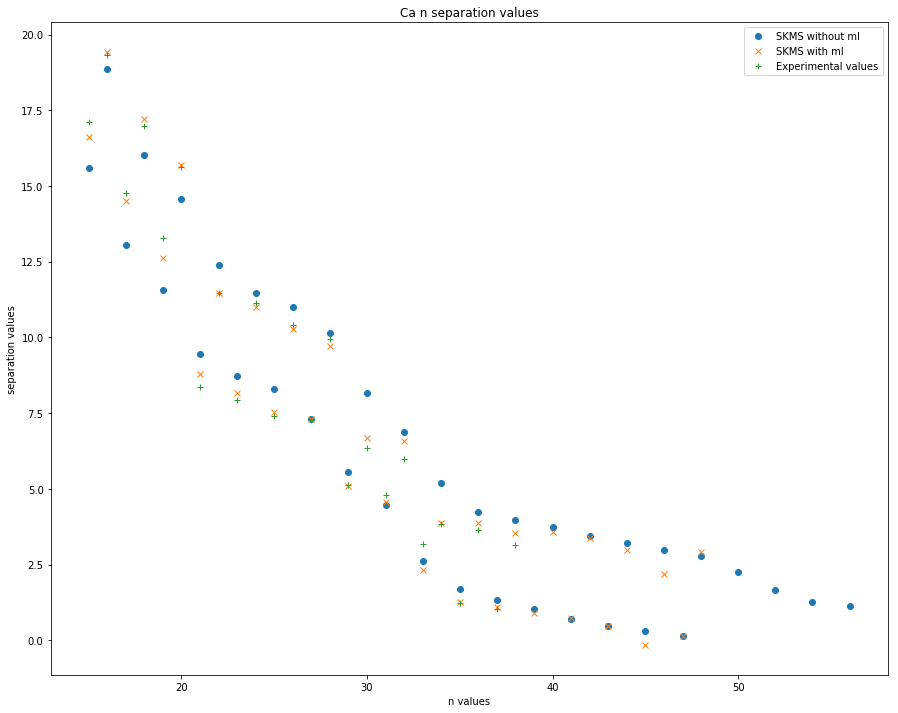

In [69]:
plt.plot(Ca_n_SKMS_vals, Ca_SKMS_sep_n, 'o')
plt.plot(Ca_n_SKMS_ml_vals, Ca_SKMS_ml_sep_n, 'x')
plt.plot(Ca_n_exp_vals, Ca_exp_sep_n, '+')
plt.gca().legend(('SKMS without ml','SKMS with ml', 'Experimental values'))
plt.title('Ca n separation values')
plt.xlabel('n values')
plt.ylabel('separation values')
plt.show()

In [70]:
# 2 N Separation Energy Values


Ca_2n_exp_vals     =[] #n values for all Experimental values
Ca_exp_sep_2n      =[]

Ca_2n_SKMS_vals    =[]
Ca_SKMS_sep_2n     =[]

Ca_2n_SKMS_ml_vals =[]
Ca_SKMS_ml_sep_2n  =[]


for i in range(351, 375):
    #print(i)
    Ca_2n_exp_vals.append(N_exp[i])
    Ca_exp_sep_2n.append(-S_2n_exp[i])
    #print('N:', N_exp[i], 'S:', -S_2n_exp[i])

#print('\n')
for i in range(348, 386):
    #print(i)
    Ca_2n_SKMS_vals.append(N_SKMS[i])
    Ca_SKMS_sep_2n.append(-S_2n_SKMS[i])
    #print('N:', N_SKMS[i], 'S:', -S_2n_SKMS[i])


#print('\n')
for n in range(16, 57):
    try:
        #print('n-(n-2)', n, n-2)
        y_now=y_SKMS_d[20,n]+rf_NZ.predict([[20, n]])
        y_previous=y_SKMS_d[20,n-2]+rf_NZ.predict([[20, n-2]])
        Ca_2n_SKMS_ml_vals.append(n)
        Ca_SKMS_ml_sep_2n.append(y_now-y_previous)
        #print('N:', n, 'S:', y_now-y_previous)

    except KeyError:
        continue


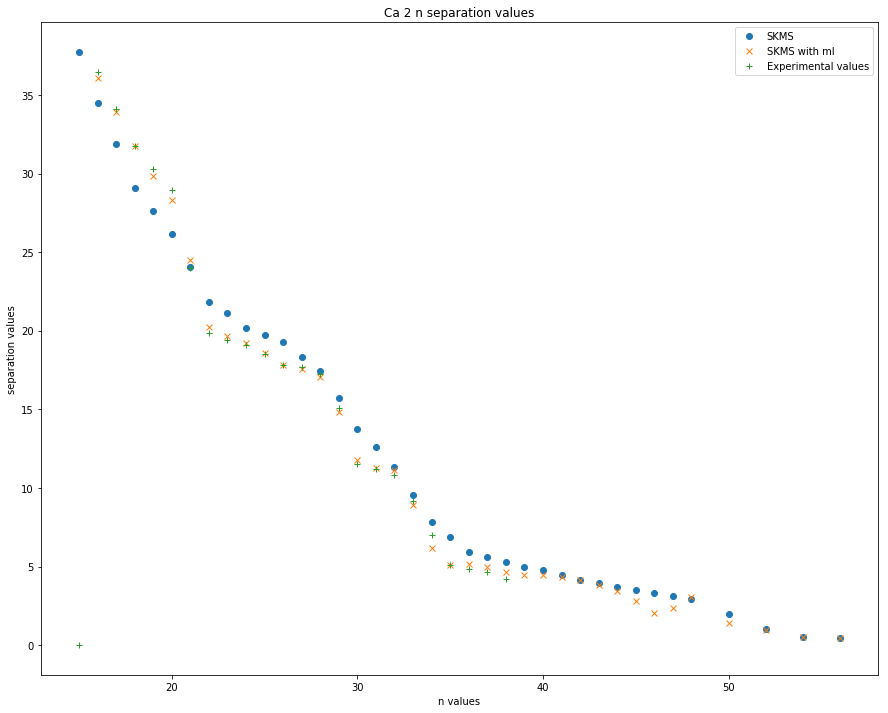

In [71]:
plt.plot(Ca_2n_SKMS_vals, Ca_SKMS_sep_2n, 'o')
plt.plot(Ca_2n_SKMS_ml_vals, Ca_SKMS_ml_sep_2n, 'x')
plt.plot(Ca_2n_exp_vals, Ca_exp_sep_2n, '+')
plt.gca().legend(('SKMS','SKMS with ml', 'Experimental values'))
plt.title('Ca 2 n separation values')
plt.xlabel('n values')
plt.ylabel('separation values')
plt.show()


In [72]:
Ni_n_SKMS_vals    =[] #n values for all SKMS theoretical values
Ni_SKMS_sep_n     =[] #SKMS separation values WITHOUT ML

Ni_n_SKMS_ml_vals =[]
Ni_SKMS_ml_sep_n  =[] #SKMS separation values WITH ML

Ni_n_exp_vals     =[] #n values for all Experimental values
Ni_exp_sep_n      =[] #Experimental separation values 




#experimental loop
for i in range(577,609):
    Ni_n_exp_vals.append(N_exp[i])
    Ni_exp_sep_n.append(-S_n_exp[i])
    #print('N:', N_exp[i], 'S:', -S_n_exp[i])

#print('\n')
for i in range(667, 712):
    Ni_n_SKMS_vals.append(N_SKMS[i])
    Ni_SKMS_sep_n.append(-S_n_SKMS[i])
    #print('N:', N_SKMS[i], 'S:', -S_n_SKMS[i])

#print('\n')
for n in range(19, 72):
    try:
        #finding SKMS separation values with added ml component
        y_now=y_SKMS_d[28,n]+rf_NZ.predict([[28, n]])
        y_previous=y_SKMS_d[28,n-1]+rf_NZ.predict([[28, n-1]])
        #appending theoretical values and their n values to lists
        Ni_n_SKMS_ml_vals.append(n)
        Ni_SKMS_ml_sep_n.append(y_now-y_previous)
        #print('N:', n, 'S:', y_now-y_previous)

    except KeyError:
        continue   


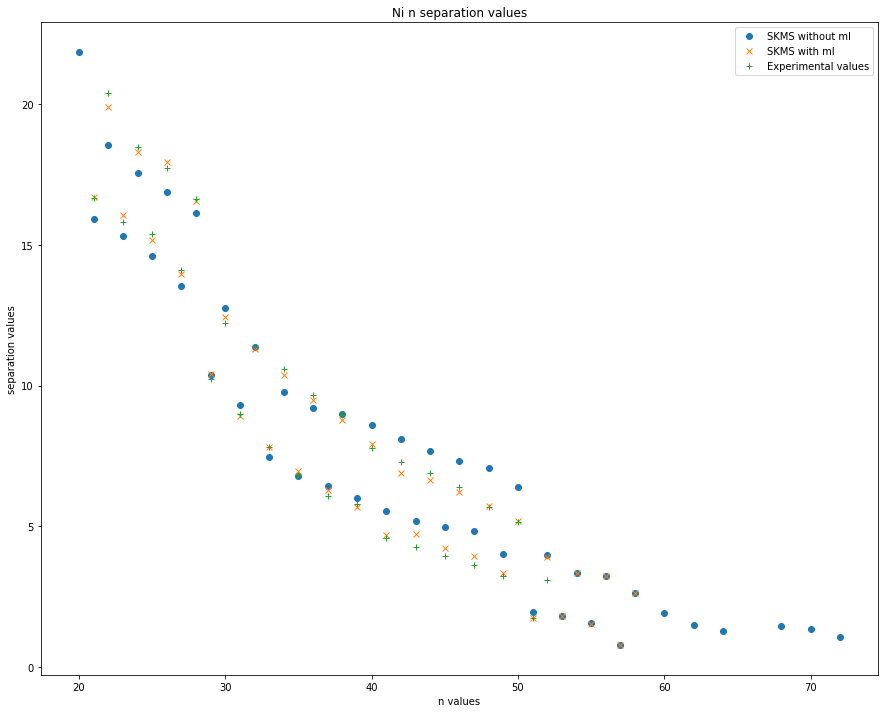

In [73]:
plt.plot(Ni_n_SKMS_vals, Ni_SKMS_sep_n, 'o')
plt.plot(Ni_n_SKMS_ml_vals, Ni_SKMS_ml_sep_n, 'x')
plt.plot(Ni_n_exp_vals, Ni_exp_sep_n, '+')
plt.gca().legend(('SKMS without ml','SKMS with ml','Experimental values'))
plt.title('Ni n separation values')
plt.xlabel('n values')
plt.ylabel('separation values')
plt.show()


In [76]:
Ni_2n_exp_vals     =[] #n values for all Experimental values
Ni_exp_sep_2n      =[]

Ni_2n_SKMS_vals    =[]
Ni_SKMS_sep_2n     =[]

Ni_2n_SKMS_ml_vals =[]
Ni_SKMS_ml_sep_2n  =[]


for i in range(578, 609):
    #print(i)
    Ni_2n_exp_vals.append(N_exp[i])
    Ni_exp_sep_2n.append(-S_2n_exp[i])
    #print('N:', N_exp[i], 'S:', -S_2n_exp[i])


#print('\n')

for i in range(667, 712):
    #print(i)
    Ni_2n_SKMS_vals.append(N_SKMS[i])
    Ni_SKMS_sep_2n.append(-S_2n_SKMS[i])
    #print('N:', N_SKMS[i], 'S:', -S_2n_SKMS[i])

#print('\n')

for n in range(20, 73):
    try:
        #print('n-(n-2)', n, n-2)
        y_now=y_SKMS_d[28,n]+rf_NZ.predict([[28, n]])
        y_previous=y_SKMS_d[28,n-2]+rf_NZ.predict([[28, n-2]])
        Ni_2n_SKMS_ml_vals.append(n)
        Ni_SKMS_ml_sep_2n.append(y_now-y_previous)
        #print('N:', n, 'S:', y_now-y_previous)

    except KeyError:
        continue


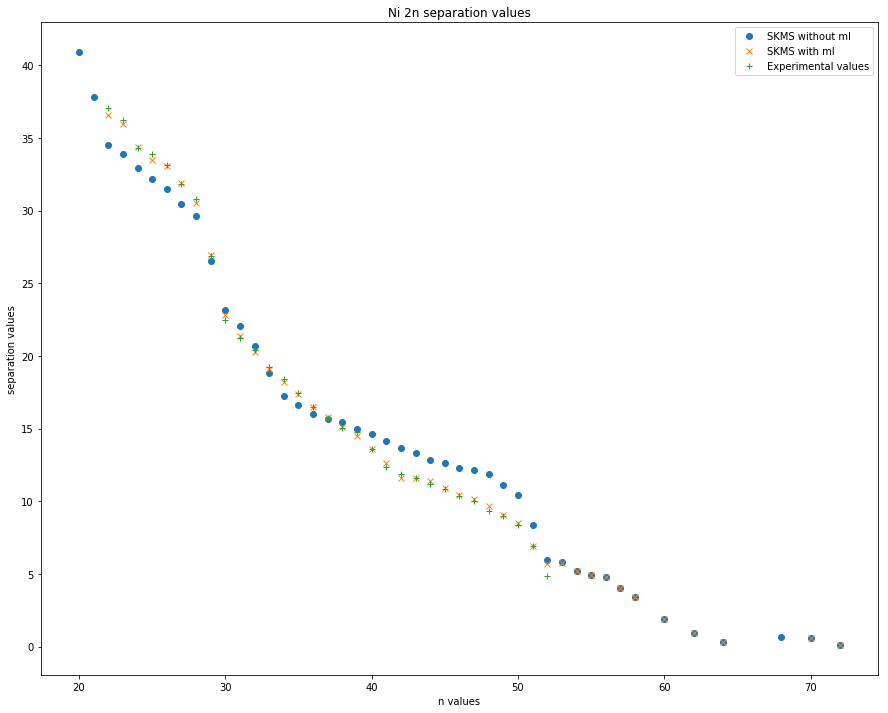

In [77]:
plt.plot(Ni_2n_SKMS_vals,    Ni_SKMS_sep_2n, 'o')
plt.plot(Ni_2n_SKMS_ml_vals, Ni_SKMS_ml_sep_2n, 'x')
plt.plot(Ni_2n_exp_vals,     Ni_exp_sep_2n, '+')
plt.gca().legend(('SKMS without ml','SKMS with ml', 'Experimental values'))
plt.title('Ni 2n separation values')
plt.xlabel('n values')
plt.ylabel('separation values')
plt.show()



In [93]:
He_diff=[]
O_diff =[]
Ca_diff=[]
Ni_diff=[]
Sn_diff=[]
Pb_diff=[]

#experimental
#z=2  n=2-8
#z=8  n=4-20
#z=20 n=14-38
#z=28 n=20-52
#z=50 n=49-89
#z=82 n=96-138

He_exp_i=2
He_exp_f=8

O_exp_i=4
O_exp_f=20

Ca_exp_i=14
Ca_exp_f=38

Ni_exp_i=20
Ni_exp_f=52

Sn_exp_i=49
Sn_exp_f=89

Pb_exp_i=96
Pb_exp_f=138

#SKMS
#z=2  n=2-6
#z=8  n=4-20
#z=20 n=14-56
#z=28 n=20-72
#z=50 n=46-126
#z=82 n=100-186


He_the_i=2
He_the_f=6

O_the_i=4
O_the_f=20

Ca_the_i=14
Ca_the_f=56

Ni_the_i=20
Ni_the_f=72

Sn_the_i=46
Sn_the_f=126

Pb_the_i=100
Pb_the_f=186

for n in range(1,200):
    He_diff.append( rf_NZ.predict([[2,n ]]))
    O_diff.append(  rf_NZ.predict([[8,n ]]))
    Ca_diff.append( rf_NZ.predict([[20,n]]))
    Ni_diff.append( rf_NZ.predict([[28,n]]))
    Sn_diff.append( rf_NZ.predict([[50,n]]))
    Pb_diff.append( rf_NZ.predict([[82,n]]))
   

In [110]:
He_NZQ_diff=[]
O_NZQ_diff =[]
Ca_NZQ_diff=[]
Ni_NZQ_diff=[]
Sn_NZQ_diff=[]
Pb_NZQ_diff=[]


for n in range(1,200):
    try:
        He_NZQ_diff.append( rf_NZQ.predict([[n, 2, Q_SKMS_d[2,n] ]]))
    except KeyError:
        continue
        

for n in range(1,200):
    try:
        O_NZQ_diff.append( rf_NZQ.predict([[n, 8, Q_SKMS_d[8,n] ]]))
    except KeyError:
        continue

for n in range(1,200):
    try:
        Ca_NZQ_diff.append( rf_NZQ.predict([[n, 20, Q_SKMS_d[20,n] ]]))
    except KeyError:
        continue
        

for n in range(1,200):
    try:
        Ni_NZQ_diff.append( rf_NZQ.predict([[n, 28, Q_SKMS_d[28,n] ]]))
    except KeyError:
        continue
        

for n in range(1,200):
    try:
        Sn_NZQ_diff.append( rf_NZQ.predict([[n, 50, Q_SKMS_d[50,n] ]]))
    except KeyError:
        continue
        

for n in range(1,400):
    try:
        Pb_NZQ_diff.append( rf_NZQ.predict([[n, 82, Q_SKMS_d[82,n] ]]))
    except KeyError:
        continue

        
        

[array([-3.51026552]), array([-5.80733689]), array([-5.8310414])]
[array([-3.61669853]), array([-3.38779624]), array([-3.10665323]), array([-2.50743134]), array([-2.40120141]), array([-2.31521166]), array([-2.98359664]), array([-4.52792327]), array([-8.15480539]), array([-9.28960104]), array([-8.64362602]), array([-9.32757039]), array([-9.39700401]), array([-9.32822743]), array([-9.86606974])]


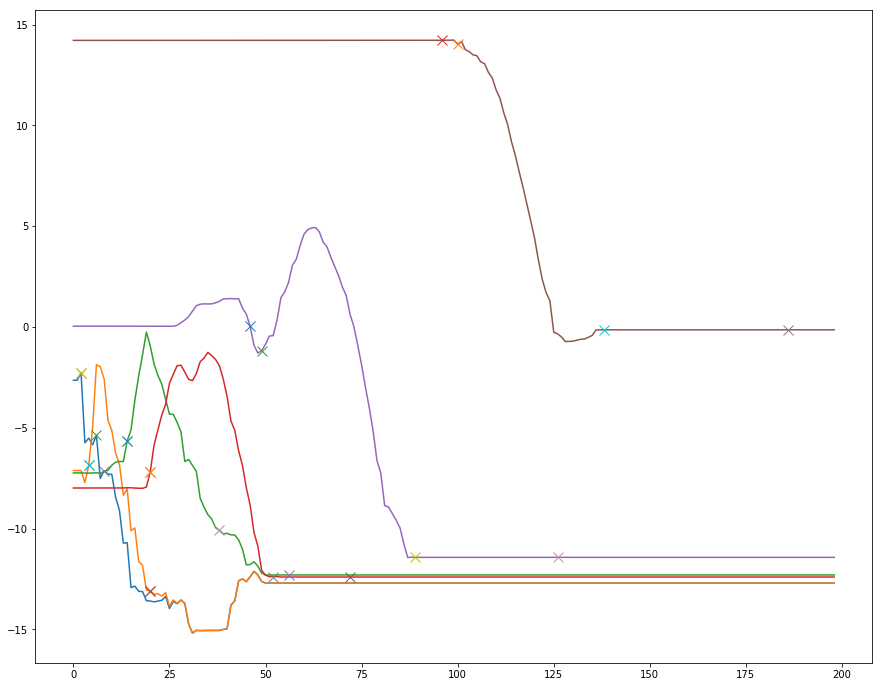

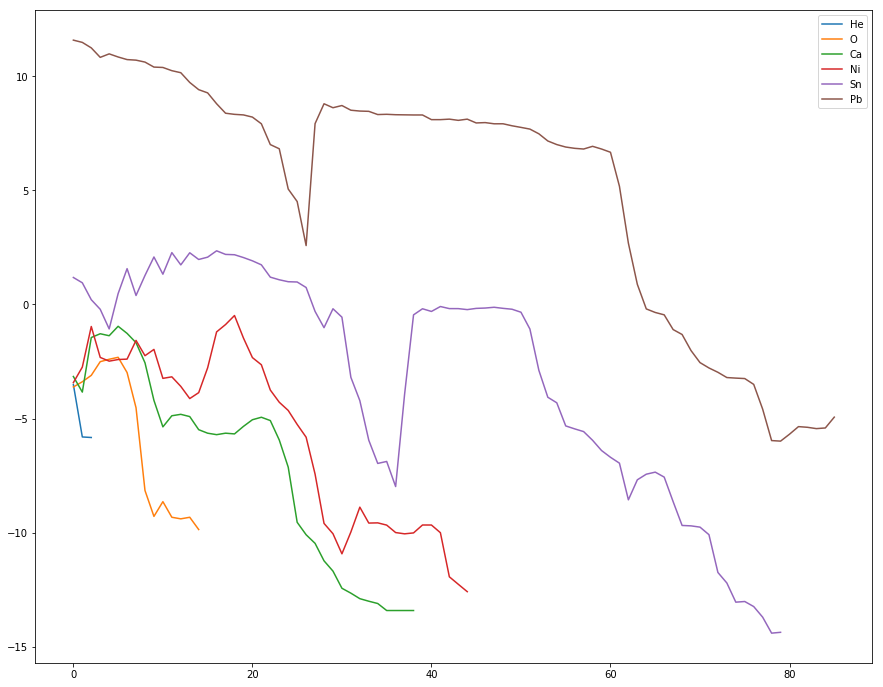

In [113]:
   
plt.plot(He_diff)
plt.plot( O_diff)
plt.plot(Ca_diff)
plt.plot(Ni_diff)
plt.plot(Sn_diff)
plt.plot(Pb_diff)

plt.plot(He_the_i, He_diff[He_the_i],   'x', Markersize=10)
plt.plot(O_the_i , O_diff[O_the_i]  ,   'x', Markersize=10)
plt.plot(Ca_the_i, Ca_diff[Ca_the_i],   'x', Markersize=10)
plt.plot(Ni_the_i, Ni_diff[Ni_the_i],   'x', Markersize=10)
plt.plot(Sn_the_i, Sn_diff[Sn_the_i],   'x', Markersize=10)
plt.plot(Pb_the_i, Pb_diff[Pb_the_i],   'x', Markersize=10)

plt.plot(He_the_f, He_diff[He_the_f],   'x', Markersize=10)
plt.plot(O_the_f , O_diff[O_the_f]  ,   'x', Markersize=10)
plt.plot(Ca_the_f, Ca_diff[Ca_the_f],   'x', Markersize=10)
plt.plot(Ni_the_f, Ni_diff[Ni_the_f],   'x', Markersize=10)
plt.plot(Sn_the_f, Sn_diff[Sn_the_f],   'x', Markersize=10)
plt.plot(Pb_the_f, Pb_diff[Pb_the_f],   'x', Markersize=10)

plt.plot(He_exp_i, He_diff[He_exp_i],   'x', Markersize=10)
plt.plot(O_exp_i , O_diff[O_exp_i]  ,   'x', Markersize=10)
plt.plot(Ca_exp_i, Ca_diff[Ca_exp_i],   'x', Markersize=10)
plt.plot(Ni_exp_i, Ni_diff[Ni_exp_i],   'x', Markersize=10)
plt.plot(Sn_exp_i, Sn_diff[Sn_exp_i],   'x', Markersize=10)
plt.plot(Pb_exp_i, Pb_diff[Pb_exp_i],   'x', Markersize=10)

plt.plot(He_exp_f, He_diff[He_exp_f],   'x', Markersize=10)
plt.plot(O_exp_f , O_diff[O_exp_f]  ,   'x', Markersize=10)
plt.plot(Ca_exp_f, Ca_diff[Ca_exp_f],   'x', Markersize=10)
plt.plot(Ni_exp_f, Ni_diff[Ni_exp_f],   'x', Markersize=10)
plt.plot(Sn_exp_f, Sn_diff[Sn_exp_f],   'x', Markersize=10)
plt.plot(Pb_exp_f, Pb_diff[Pb_exp_f],   'x', Markersize=10)

plt.show()

   
plt.plot(He_NZQ_diff)
plt.plot( O_NZQ_diff)
plt.plot(Ca_NZQ_diff)
plt.plot(Ni_NZQ_diff)
plt.plot(Sn_NZQ_diff)
plt.plot(Pb_NZQ_diff)

"""
plt.plot(He_the_i, He_NZQ_diff[He_the_i],   'x', Markersize=10)
plt.plot(O_the_i , O_NZQ_diff[O_the_i]  ,   'x', Markersize=10)
plt.plot(Ca_the_i, Ca_NZQ_diff[Ca_the_i],   'x', Markersize=10)
plt.plot(Ni_the_i, Ni_NZQ_diff[Ni_the_i],   'x', Markersize=10)
plt.plot(Sn_the_i, Sn_NZQ_diff[Sn_the_i],   'x', Markersize=10)
plt.plot(Pb_the_i, Pb_NZQ_diff[Pb_the_i],   'x', Markersize=10)

plt.plot(He_the_f, He_NZQ_diff[He_the_f],   'x', Markersize=10)
plt.plot(O_the_f , O_NZQ_diff[O_the_f]  ,   'x', Markersize=10)
plt.plot(Ca_the_f, Ca_NZQ_diff[Ca_the_f],   'x', Markersize=10)
plt.plot(Ni_the_f, Ni_NZQ_diff[Ni_the_f],   'x', Markersize=10)
plt.plot(Sn_the_f, Sn_NZQ_diff[Sn_the_f],   'x', Markersize=10)
plt.plot(Pb_the_f, Pb_NZQ_diff[Pb_the_f],   'x', Markersize=10)

plt.plot(He_exp_i, He_NZQ_diff[He_exp_i],   'x', Markersize=10)
plt.plot(O_exp_i , O_NZQ_diff[O_exp_i]  ,   'x', Markersize=10)
plt.plot(Ca_exp_i, Ca_NZQ_diff[Ca_exp_i],   'x', Markersize=10)
plt.plot(Ni_exp_i, Ni_NZQ_diff[Ni_exp_i],   'x', Markersize=10)
plt.plot(Sn_exp_i, Sn_NZQ_diff[Sn_exp_i],   'x', Markersize=10)
plt.plot(Pb_exp_i, Pb_NZQ_diff[Pb_exp_i],   'x', Markersize=10)

plt.plot(He_exp_f, He_NZQ_diff[He_exp_f],   'x', Markersize=10)
plt.plot(O_exp_f , O_NZQ_diff[O_exp_f]  ,   'x', Markersize=10)
plt.plot(Ca_exp_f, Ca_NZQ_diff[Ca_exp_f],   'x', Markersize=10)
plt.plot(Ni_exp_f, Ni_NZQ_diff[Ni_exp_f],   'x', Markersize=10)
plt.plot(Sn_exp_f, Sn_NZQ_diff[Sn_exp_f],   'x', Markersize=10)
plt.plot(Pb_exp_f, Pb_NZQ_diff[Pb_exp_f],   'x', Markersize=10)
"""
plt.gca().legend(('He', 'O', 'Ca', 'Ni', 'Sn', 'Pb'))  

plt.show()

In [104]:
for n in range(1,200):
    try:
        O_Q_vals.append(Q_SKMS_d[8,n]) 
    except KeyError:
        continue

        
for n in range(1,200):
    try:
        Ca_Q_vals.append(Q_SKMS_d[20,n])
    except KeyError:
        continue
   
for n in range(1,200):
    try:
        
        Ni_Q_vals.append(Q_SKMS_d[28,n])
    except KeyError:
        continue
   
for n in range(1,200):
    try:
        Sn_Q_vals.append(Q_SKMS_d[50,n])
    except KeyError:
        continue
        
for n in range(1,200):
    try:
        
        Pb_Q_vals.append(Q_SKMS_d[82,n])
    except KeyError:
        continue
        

    
#print(He_Q_vals )
#print(O_Q_vals  )
#print(Ca_Q_vals  )
#print(Ni_Q_vals  )
#print(Sn_Q_vals  )
#print(Pb_Q_vals  )

In [90]:
for n in range(196,0,-1):
    if He_diff[n+1] !=He_diff[n]:    #==He_diff[n+1]==He_diff[n+2]:
        He_plateau=n
        break
        
for n in range(196,0,-1):
    if O_diff[n+1] !=O_diff[n]: 
        O_plateau=n
        break


for n in range(196,0,-1):
    if Ca_diff[n+1] !=Ca_diff[n]: 
        Ca_plateau=n
        break
        

for n in range(196,0,-1):
    if Ni_diff[n+1] !=Ni_diff[n]: 
        Ni_plateau=n
        break
        

for n in range(196,0,-1):
    if Sn_diff[n+1] !=Sn_diff[n]: 
        Sn_plateau=n
        break
        

for n in range(196,0,-1):
    if Pb_diff[n+1] !=Pb_diff[n]: 
        Pb_plateau=n
        break

print(O_plateau)
print(He_plateau)
print(Ca_plateau)
print(Ni_plateau)
print(Sn_plateau)
print(Pb_plateau)

50
50
50
53
88
136


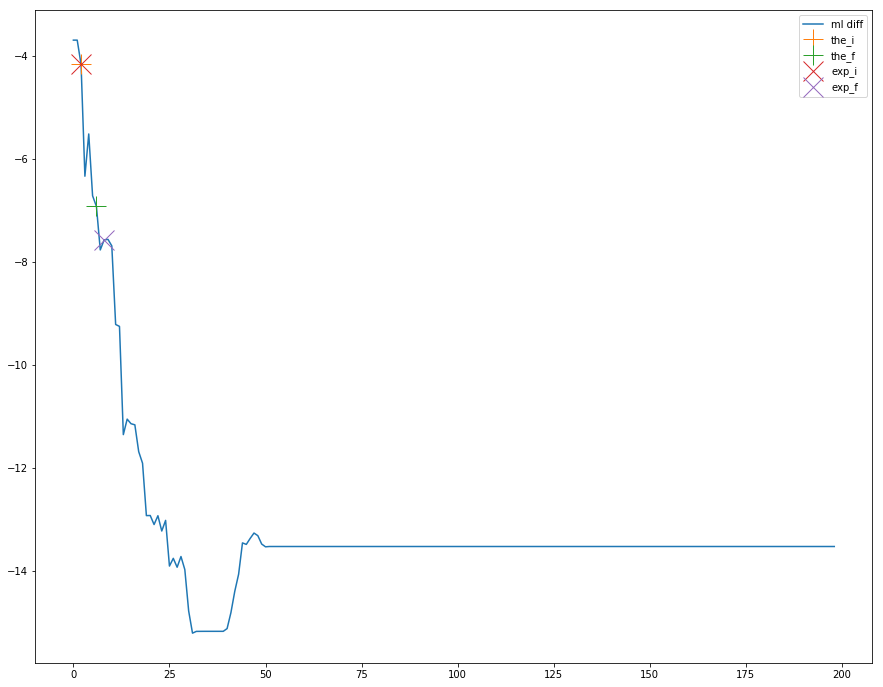

In [75]:
plt.plot(He_diff)

plt.plot(He_the_i, He_diff[He_the_i],   '+', Markersize=20)

plt.plot(He_the_f, He_diff[He_the_f],   '+', Markersize=20)

plt.plot(He_exp_i, He_diff[He_exp_i],   'x', Markersize=20)

plt.plot(He_exp_f, He_diff[He_exp_f],   'x', Markersize=20)
plt.gca().legend(('ml diff', 'the_i', 'the_f', 'exp_i', 'exp_f'))  
plt.show()

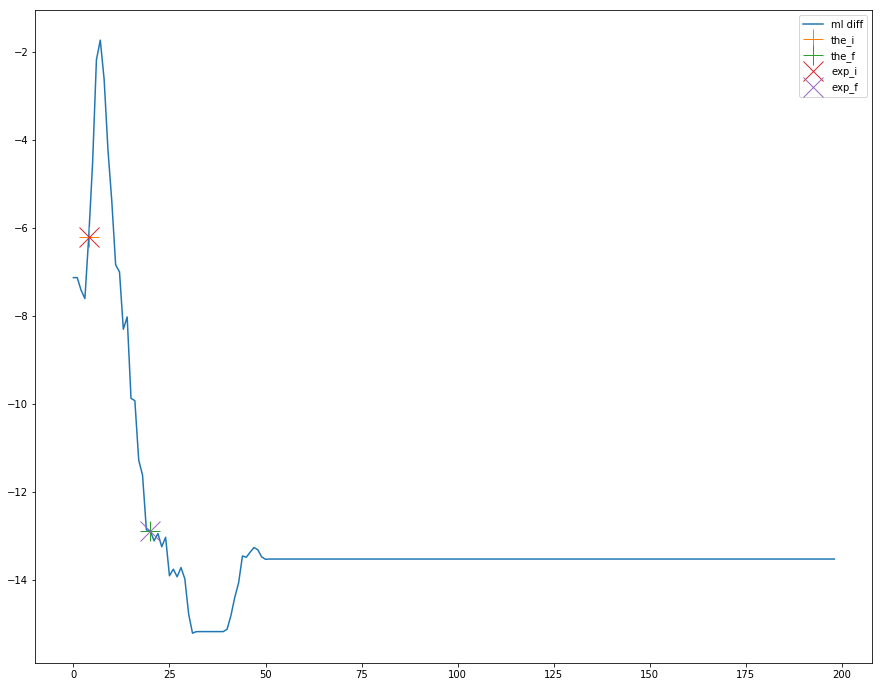

In [76]:
plt.plot(O_diff)

plt.plot(O_the_i, O_diff[O_the_i],   '+', Markersize=20)

plt.plot(O_the_f, O_diff[O_the_f],   '+', Markersize=20)

plt.plot(O_exp_i, O_diff[O_exp_i],   'x', Markersize=20)

plt.plot(O_exp_f, O_diff[O_exp_f],   'x', Markersize=20)
plt.gca().legend(('ml diff', 'the_i', 'the_f', 'exp_i', 'exp_f'))  
plt.show()

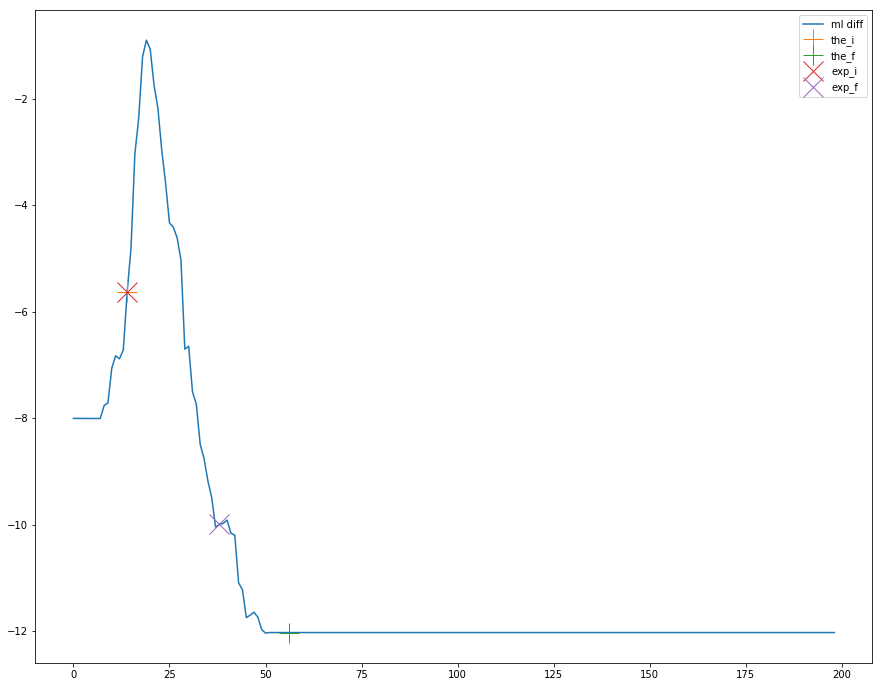

In [77]:
plt.plot(Ca_diff)

plt.plot(Ca_the_i, Ca_diff[Ca_the_i],   '+', Markersize=20)

plt.plot(Ca_the_f, Ca_diff[Ca_the_f],   '+', Markersize=20)

plt.plot(Ca_exp_i, Ca_diff[Ca_exp_i],   'x', Markersize=20)

plt.plot(Ca_exp_f, Ca_diff[Ca_exp_f],   'x', Markersize=20)
plt.gca().legend(('ml diff', 'the_i', 'the_f', 'exp_i', 'exp_f'))  
plt.show()

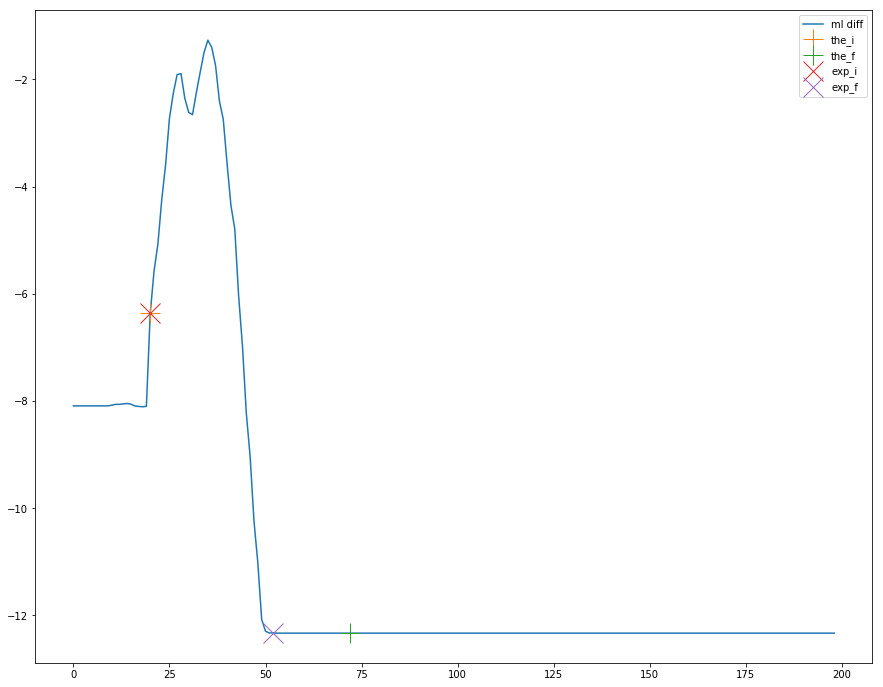

In [78]:
plt.plot(Ni_diff)

plt.plot(Ni_the_i, Ni_diff[Ni_the_i],   '+', Markersize=20)

plt.plot(Ni_the_f, Ni_diff[Ni_the_f],   '+', Markersize=20)

plt.plot(Ni_exp_i, Ni_diff[Ni_exp_i],   'x', Markersize=20)

plt.plot(Ni_exp_f, Ni_diff[Ni_exp_f],   'x', Markersize=20)
plt.gca().legend(('ml diff', 'the_i', 'the_f', 'exp_i', 'exp_f'))  
plt.show()

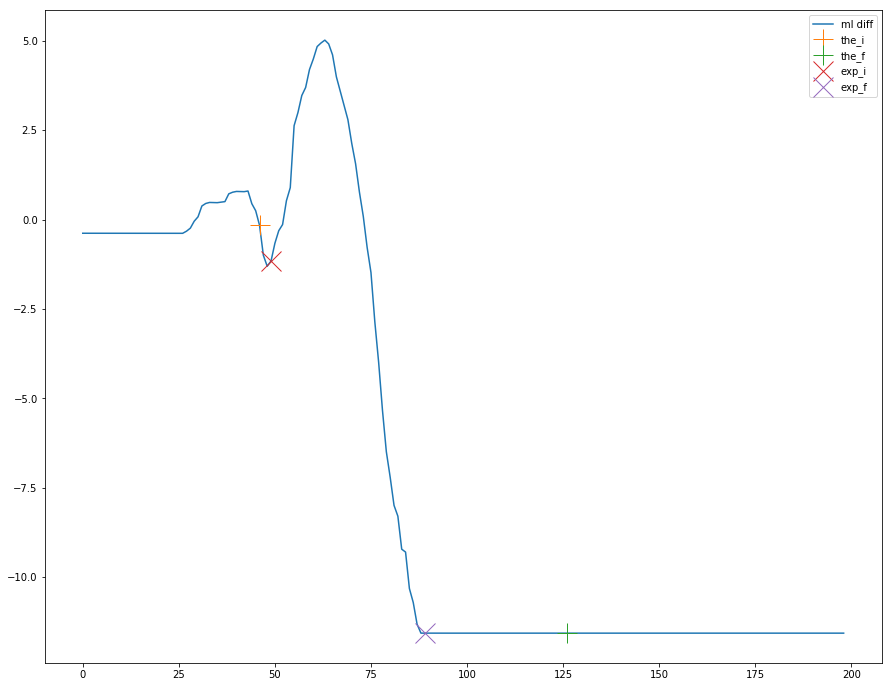

In [79]:
plt.plot(Sn_diff)

plt.plot(Sn_the_i, Sn_diff[Sn_the_i],   '+', Markersize=20)

plt.plot(Sn_the_f, Sn_diff[Sn_the_f],   '+', Markersize=20)

plt.plot(Sn_exp_i, Sn_diff[Sn_exp_i],   'x', Markersize=20)

plt.plot(Sn_exp_f, Sn_diff[Sn_exp_f],   'x', Markersize=20)
plt.gca().legend(('ml diff', 'the_i', 'the_f', 'exp_i', 'exp_f'))  
plt.show()

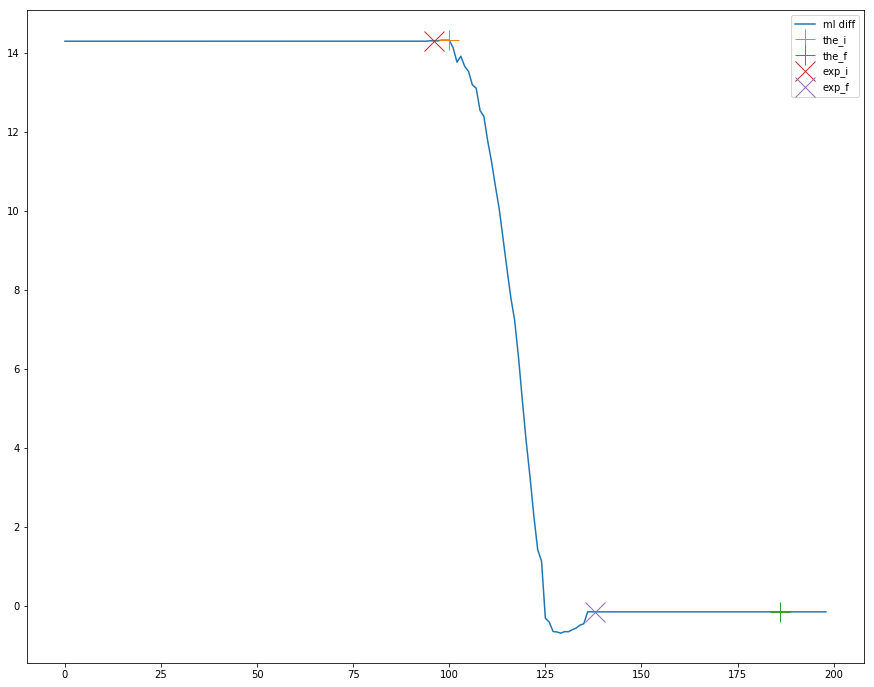

In [80]:
plt.plot(Pb_diff)

plt.plot(Pb_the_i, Pb_diff[Pb_the_i],   '+', Markersize=20)

plt.plot(Pb_the_f, Pb_diff[Pb_the_f],   '+', Markersize=20)

plt.plot(Pb_exp_i, Pb_diff[Pb_exp_i],   'x', Markersize=20)

plt.plot(Pb_exp_f, Pb_diff[Pb_exp_f],   'x', Markersize=20)
plt.gca().legend(('ml diff', 'the_i', 'the_f', 'exp_i', 'exp_f'))  
plt.show()